## 1. 환경 설정

`(1) Env 환경변수`

In [51]:
from dotenv import load_dotenv
load_dotenv()

True

`(2) 기본 라이브러리`

In [50]:
import re
import os, json
from glob import glob

from textwrap import dedent
from pprint import pprint

import uuid

import warnings
warnings.filterwarnings("ignore")

## 2. 법률 문서를 로드하여 벡터저장소에 저장

In [52]:
os.getcwd()

'/Users/simsewon/Library/Mobile Documents/com~apple~CloudDocs/agent_project/NaturalLangProcessingInBigData'

In [53]:
os.chdir('/Users/simsewon/Library/Mobile Documents/com~apple~CloudDocs/agent_project/NaturalLangProcessingInBigData')

In [54]:
# pdf 파일 목록을 확인
pdf_files = glob(os.path.join('data', '*.pdf'))

pdf_files

['data/근로기준법(법률)(제18176호)(20211119).pdf',
 'data/개인정보 보호법(법률)(제19234호)(20240315).pdf',
 'data/주택임대차보호법(법률)(제19356호)(20230719).pdf']

###  2-1. 개인정보보호법

- PDf 문서를 가져와서 조항 별로 구분하여 정리

In [55]:
from langchain_community.document_loaders import PyPDFLoader

pdf_file = 'data/개인정보 보호법(법률)(제19234호)(20240315).pdf'

loader = PyPDFLoader(pdf_file)
pages = loader.load()

len(pages)

41

In [56]:
pages[0].page_content

'법제처                                                            1                                                       국가법령정보센터\n개인정보 보호법 \n \n개인정보 보호법 \n[시행 2024. 3. 15.] [법률 제19234호, 2023. 3. 14., 일부개정] \n개인정보보호위원회 (심사총괄담당관 - 일반 법령해석) 02-2100-3043 \n개인정보보호위원회 (국제협력담당관 - 국외이전) 02-2100-2484, 2499 \n개인정보보호위원회 (개인정보보호정책과 - 법령 제ㆍ개정, 아동ㆍ청소년) 02-2100-3057, 3047 \n개인정보보호위원회 (신기술개인정보과 - 영상정보, 안전조치) 02-2100-3064, 3028 \n개인정보보호위원회 (데이터안전정책과 - 가명정보, 개인정보안심구역) 02-2100-3088, 3074, 3058, 3079 \n개인정보보호위원회 (자율보호정책과 - 보호책임자, 자율규제, 보호수준 평가, 처리방침, 영향평가) 02-2100-3083, 3089, 3087, 3096,\n3086 \n개인정보보호위원회 (분쟁조정과 - 분쟁조정, 손해배상책임) 1833-6972, 02-2100-3142 \n개인정보보호위원회 (범정부마이데이터 추진단(전략기획팀 - 전송요구권(마이데이터)) 02-2100-3173 \n       제1장 총칙\n \n제1조(목적) 이 법은 개인정보의 처리 및 보호에 관한 사항을 정함으로써 개인의 자유와 권리를 보호하고, 나아가 개인\n의 존엄과 가치를 구현함을 목적으로 한다. <개정 2014. 3. 24.>\n \n제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2014. 3. 24., 2020. 2. 4., 2023. 3. 14.>\n1. “개인정보”란 살아 있는 개인에 관한 정보로서 다음 각 목의 어느 하나에 해당하는 정보를 말한다.\n가. 성명, 주민등록번호 및 영상 등을 통하여 개

In [57]:
pages[0].metadata

{'source': 'data/개인정보 보호법(법률)(제19234호)(20240315).pdf',
 'page': 0}

In [58]:
print(pages[0].page_content)

법제처                                                            1                                                       국가법령정보센터
개인정보 보호법 
 
개인정보 보호법 
[시행 2024. 3. 15.] [법률 제19234호, 2023. 3. 14., 일부개정] 
개인정보보호위원회 (심사총괄담당관 - 일반 법령해석) 02-2100-3043 
개인정보보호위원회 (국제협력담당관 - 국외이전) 02-2100-2484, 2499 
개인정보보호위원회 (개인정보보호정책과 - 법령 제ㆍ개정, 아동ㆍ청소년) 02-2100-3057, 3047 
개인정보보호위원회 (신기술개인정보과 - 영상정보, 안전조치) 02-2100-3064, 3028 
개인정보보호위원회 (데이터안전정책과 - 가명정보, 개인정보안심구역) 02-2100-3088, 3074, 3058, 3079 
개인정보보호위원회 (자율보호정책과 - 보호책임자, 자율규제, 보호수준 평가, 처리방침, 영향평가) 02-2100-3083, 3089, 3087, 3096,
3086 
개인정보보호위원회 (분쟁조정과 - 분쟁조정, 손해배상책임) 1833-6972, 02-2100-3142 
개인정보보호위원회 (범정부마이데이터 추진단(전략기획팀 - 전송요구권(마이데이터)) 02-2100-3173 
       제1장 총칙
 
제1조(목적) 이 법은 개인정보의 처리 및 보호에 관한 사항을 정함으로써 개인의 자유와 권리를 보호하고, 나아가 개인
의 존엄과 가치를 구현함을 목적으로 한다. <개정 2014. 3. 24.>
 
제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2014. 3. 24., 2020. 2. 4., 2023. 3. 14.>
1. “개인정보”란 살아 있는 개인에 관한 정보로서 다음 각 목의 어느 하나에 해당하는 정보를 말한다.
가. 성명, 주민등록번호 및 영상 등을 통하여 개인을 알아볼 수 있는 정보 
나. 해당 

In [59]:
def parse_law(law_text):
    # 서문 분리
    # '^'로 시작하여 '제1장' 또는 '제1조' 직전까지의 모든 텍스트를 탐색 
    preamble_pattern = r'^(.*?)(?=제1장|제1조)'
    preamble = re.search(preamble_pattern, law_text, re.DOTALL)
    if preamble:
        preamble = preamble.group(1).strip()
    
    # 장 분리 
    # '제X장' 형식의 제목과 그 뒤에 오는 모든 조항을 하나의 그룹화 
    chapter_pattern = r'(제\d+장\s+.+?)\n((?:제\d+조(?:의\d+)?(?:\(\w+\))?.*?)(?=제\d+장|부칙|$))'
    chapters = re.findall(chapter_pattern, law_text, re.DOTALL)
    
    # 부칙 분리
    # '부칙'으로 시작하는 모든 텍스트를 탐색 
    appendix_pattern = r'(부칙.*)'
    appendix = re.search(appendix_pattern, law_text, re.DOTALL)
    if appendix:
        appendix = appendix.group(1)
    
    # 파싱 결과를 저장할 딕셔너리 초기화
    parsed_law = {'서문': preamble, '장': {}, '부칙': appendix}
    
    # 각 장 내에서 조 분리
    for chapter_title, chapter_content in chapters:
        # 조 분리 패턴
        # 1. '제X조'로 시작 ('제X조의Y' 형식도 가능)
        # 2. 조 번호 뒤에 반드시 '(항목명)' 형식의 제목이 와야 함 
        # 3. 다음 조가 시작되기 전까지 또는 문서의 끝까지의 모든 내용을 포함
        article_pattern = r'(제\d+조(?:의\d+)?\s*\([^)]+\).*?)(?=제\d+조(?:의\d+)?\s*\([^)]+\)|$)'
        
        # 정규표현식을 이용해 모든 조항을 탐색 
        articles = re.findall(article_pattern, chapter_content, re.DOTALL)
        
        # 각 조항의 앞뒤 공백을 제거하고 결과 딕셔너리에 저장
        parsed_law['장'][chapter_title.strip()] = [article.strip() for article in articles]
    
    return parsed_law


# 각 페이지의 텍스트를 결합하여 재분리
text_for_delete = r"법제처\s+\d+\s+국가법령정보센터\n개인정보 보호법"

law_text = "\n".join([re.sub(text_for_delete, "", p.page_content).strip() for p in pages])

parsed_law = parse_law(law_text)

# 분할된 아이템 갯수 확인
print(len(parsed_law["장"]))

10


In [154]:
parsed_law.keys()

dict_keys(['서문', '부칙', '조문'])

- 랭체인 Document 객체에 메타데이터와 함께 정리

In [61]:
from langchain_core.documents import Document

final_docs = []
for law in parsed_law['장'].keys():
    for article in parsed_law['장'][law]:

        # metadata 내용을 정리 
        metadata = {
                "source": pdf_file,
                "chapter": law,
                "name" : "개인정보 보호법"
                }

        # metadata 내용을 본문에 추가 
        content = f"[법률정보]\n다음 조항은 {metadata['name']} {metadata['chapter']}에서 발췌한 내용입니다.\n\n[법률조항]\n{article}"

        final_docs.append(Document(page_content=content, metadata=metadata))
        
len(final_docs)


109

In [62]:
print(final_docs[0].page_content)
print()


[법률정보]
다음 조항은 개인정보 보호법 제1장 총칙에서 발췌한 내용입니다.

[법률조항]
제1조(목적) 이 법은 개인정보의 처리 및 보호에 관한 사항을 정함으로써 개인의 자유와 권리를 보호하고, 나아가 개인
의 존엄과 가치를 구현함을 목적으로 한다. <개정 2014. 3. 24.>



In [63]:
print(final_docs[0].metadata)

{'source': 'data/개인정보 보호법(법률)(제19234호)(20240315).pdf', 'chapter': '제1장 총칙', 'name': '개인정보 보호법'}


In [64]:
print(final_docs[-1].page_content)
print()
print(final_docs[-1].metadata)

[법률정보]
다음 조항은 개인정보 보호법 제10장 벌칙 <개정 2020. 2. 4.>에서 발췌한 내용입니다.

[법률조항]
제76조(과태료에 관한 규정 적용의 특례) 제75조의 과태료에 관한 규정을 적용할 때 제64조의2에 따라 과징금을 부과
한 행위에 대하여는 과태료를 부과할 수 없다. <개정 2023. 3. 14.>
[본조신설 2013. 8. 6.]

{'source': 'data/개인정보 보호법(법률)(제19234호)(20240315).pdf', 'chapter': '제10장 벌칙 <개정 2020. 2. 4.>', 'name': '개인정보 보호법'}


- 벡터저장소에 인덱싱

In [65]:
# 각 문서의 텍스트 길이를 확인

text_lengths = [len(d.page_content) for d in final_docs]
print(min(text_lengths), max(text_lengths))

116 2844


In [70]:
from langchain_chroma import Chroma
from langchain_ollama  import OllamaEmbeddings

embeddings_model = OllamaEmbeddings(model="bge-m3") 

In [77]:
! pwd

3155.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/Users/simsewon/Library/Mobile Documents/com~apple~CloudDocs/agent_project/NaturalLangProcessingInBigData


In [78]:

# Chroma 인덱스 생성
personal_db = Chroma.from_documents(
    documents=final_docs, 
    embedding=embeddings_model,   
    collection_name="personal_law",
    persist_directory="../chroma_db",  # NaturalLangProcessingInBigData 경로 저장 
)

###  2-2. 근로기준법

- PDf 문서를 가져와서 조항 별로 구분하여 정리

In [81]:
from langchain_community.document_loaders import PyPDFLoader

pdf_file = 'data/근로기준법(법률)(제18176호)(20211119).pdf'

loader = PyPDFLoader(pdf_file)
pages = loader.load()

len(pages)

20

In [82]:
pages[0].page_content

'법제처                                                            1                                                       국가법령정보센터\n근로기준법 \n \n근로기준법 \n[시행 2021. 11. 19.] [법률 제18176호, 2021. 5. 18., 일부개정] \n고용노동부 (근로기준정책과 - 해고, 취업규칙, 기타) 044-202-7534 \n고용노동부 (근로기준정책과 - 소년) 044-202-7535 \n고용노동부 (근로기준정책과 - 임금) 044-202-7548 \n고용노동부 (여성고용정책과 - 여성) 044-202-7475 \n고용노동부 (임금근로시간정책과 - 근로시간, 휴게) 044-202-7545 \n고용노동부 (임금근로시간정책과 - 휴일, 연차휴가) 044-202-7973 \n고용노동부 (임금근로시간정책과 - 제63조 적용제외, 특례업종) 044-202-7530 \n고용노동부 (임금근로시간정책과 - 유연근로시간제) 044-202-7549 \n       제1장 총칙\n \n제1조(목적) 이 법은 헌법에 따라 근로조건의 기준을 정함으로써 근로자의 기본적 생활을 보장, 향상시키며 균형 있는\n국민경제의 발전을 꾀하는 것을 목적으로 한다.\n \n제2조(정의) ① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2018. 3. 20., 2019. 1. 15., 2020. 5. 26.>\n1. “근로자”란 직업의 종류와 관계없이 임금을 목적으로 사업이나 사업장에 근로를 제공하는 사람을 말한다.\n2. “사용자”란 사업주 또는 사업 경영 담당자, 그 밖에 근로자에 관한 사항에 대하여 사업주를 위하여 행위하는 자를\n말한다. \n3. “근로”란 정신노동과 육체노동을 말한다.\n4. “근로계약”이란 근로자가 사용자에게 근로를 제공하고 사용자는 이에 대하여 임금을 지급하는 것을 목적으로 체\n결된 계약을 말한다. \n5. “임금”이란 사용자가 근로의 대가로 근

In [83]:
# 각 페이지의 텍스트를 결합하여 재분리
text_for_delete = r"법제처\s+\d+\s+국가법령정보센터\n근로기준법"

law_text = "\n".join([re.sub(text_for_delete, "", p.page_content).strip() for p in pages])

parsed_law = parse_law(law_text)

# 분할된 아이템 갯수 확인
print(len(parsed_law["장"]))

12


In [84]:
parsed_law

{'서문': '근로기준법 \n[시행 2021. 11. 19.] [법률 제18176호, 2021. 5. 18., 일부개정] \n고용노동부 (근로기준정책과 - 해고, 취업규칙, 기타) 044-202-7534 \n고용노동부 (근로기준정책과 - 소년) 044-202-7535 \n고용노동부 (근로기준정책과 - 임금) 044-202-7548 \n고용노동부 (여성고용정책과 - 여성) 044-202-7475 \n고용노동부 (임금근로시간정책과 - 근로시간, 휴게) 044-202-7545 \n고용노동부 (임금근로시간정책과 - 휴일, 연차휴가) 044-202-7973 \n고용노동부 (임금근로시간정책과 - 제63조 적용제외, 특례업종) 044-202-7530 \n고용노동부 (임금근로시간정책과 - 유연근로시간제) 044-202-7549',
 '장': {'제1장 총칙': ['제1조(목적) 이 법은 헌법에 따라 근로조건의 기준을 정함으로써 근로자의 기본적 생활을 보장, 향상시키며 균형 있는\n국민경제의 발전을 꾀하는 것을 목적으로 한다.',
   '제2조(정의) ① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2018. 3. 20., 2019. 1. 15., 2020. 5. 26.>\n1. “근로자”란 직업의 종류와 관계없이 임금을 목적으로 사업이나 사업장에 근로를 제공하는 사람을 말한다.\n2. “사용자”란 사업주 또는 사업 경영 담당자, 그 밖에 근로자에 관한 사항에 대하여 사업주를 위하여 행위하는 자를\n말한다. \n3. “근로”란 정신노동과 육체노동을 말한다.\n4. “근로계약”이란 근로자가 사용자에게 근로를 제공하고 사용자는 이에 대하여 임금을 지급하는 것을 목적으로 체\n결된 계약을 말한다. \n5. “임금”이란 사용자가 근로의 대가로 근로자에게 임금, 봉급, 그 밖에 어떠한 명칭으로든지 지급하는 모든 금품을\n말한다. \n6. “평균임금”이란 이를 산정하여야 할 사유가 발생한 날 이전 3개월 동안에 그 근로자에게 지급된 임금의 총액을\n그 기간의 총일수로 나눈 금액

- 랭체인 Document 객체에 메타데이터와 함께 정리

In [85]:
from langchain_core.documents import Document

final_docs = []
for law in parsed_law['장'].keys():
    for article in parsed_law['장'][law]:

        # metadata 내용을 정리 
        metadata = {
                "source": pdf_file,
                "chapter": law,
                "name" : "근로기준법"
                }

        # metadata 내용을 본문에 추가 
        content = f"[법률정보]\n다음 조항은 {metadata['name']} {metadata['chapter']}에서 발췌한 내용입니다.\n\n[법률조항]\n{article}"

        final_docs.append(Document(page_content=content, metadata=metadata))
        
len(final_docs)

88

In [86]:
print(final_docs[0].page_content)
print()
print(final_docs[0].metadata)

[법률정보]
다음 조항은 근로기준법 제1장 총칙에서 발췌한 내용입니다.

[법률조항]
제1조(목적) 이 법은 헌법에 따라 근로조건의 기준을 정함으로써 근로자의 기본적 생활을 보장, 향상시키며 균형 있는
국민경제의 발전을 꾀하는 것을 목적으로 한다.

{'source': 'data/근로기준법(법률)(제18176호)(20211119).pdf', 'chapter': '제1장 총칙', 'name': '근로기준법'}


In [87]:
print(final_docs[1].page_content)
print()
print(final_docs[1].metadata)

[법률정보]
다음 조항은 근로기준법 제1장 총칙에서 발췌한 내용입니다.

[법률조항]
제2조(정의) ① 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2018. 3. 20., 2019. 1. 15., 2020. 5. 26.>
1. “근로자”란 직업의 종류와 관계없이 임금을 목적으로 사업이나 사업장에 근로를 제공하는 사람을 말한다.
2. “사용자”란 사업주 또는 사업 경영 담당자, 그 밖에 근로자에 관한 사항에 대하여 사업주를 위하여 행위하는 자를
말한다. 
3. “근로”란 정신노동과 육체노동을 말한다.
4. “근로계약”이란 근로자가 사용자에게 근로를 제공하고 사용자는 이에 대하여 임금을 지급하는 것을 목적으로 체
결된 계약을 말한다. 
5. “임금”이란 사용자가 근로의 대가로 근로자에게 임금, 봉급, 그 밖에 어떠한 명칭으로든지 지급하는 모든 금품을
말한다. 
6. “평균임금”이란 이를 산정하여야 할 사유가 발생한 날 이전 3개월 동안에 그 근로자에게 지급된 임금의 총액을
그 기간의 총일수로 나눈 금액을 말한다. 근로자가 취업한 후 3개월 미만인 경우도 이에 준한다. 
7. “1주”란 휴일을 포함한 7일을 말한다.
8. “소정(所定)근로시간”이란 제50조, 제69조 본문 또는 「산업안전보건법」 제139조제1항에 따른 근로시간의 범위에
서 근로자와 사용자 사이에 정한 근로시간을 말한다. 
9. “단시간근로자”란 1주 동안의 소정근로시간이 그 사업장에서 같은 종류의 업무에 종사하는 통상 근로자의 1주
동안의 소정근로시간에 비하여 짧은 근로자를 말한다. 
② 제1항제6호에 따라 산출된 금액이 그 근로자의 통상임금보다 적으면 그 통상임금액을 평균임금으로 한다.

{'source': 'data/근로기준법(법률)(제18176호)(20211119).pdf', 'chapter': '제1장 총칙', 'name': '근로기준법'}


- 벡터저장소에 인덱싱

In [88]:
# 각 문서의 텍스트 길이를 확인

text_lengths = [len(d.page_content) for d in final_docs]
print(min(text_lengths), max(text_lengths))

97 1547


In [89]:
from langchain_chroma import Chroma
from langchain_ollama  import OllamaEmbeddings

embeddings_model = OllamaEmbeddings(model="bge-m3") 

# Chroma 인덱스 생성
labor_db = Chroma.from_documents(
    documents=final_docs, 
    embedding=embeddings_model,   
    collection_name="labor_law",
    persist_directory="../chroma_db",
)

###  2-3. 주택임대차보호법

- PDf 문서를 가져와서 조항 별로 구분하여 정리

In [90]:
from langchain_community.document_loaders import PyPDFLoader

pdf_file = 'data/주택임대차보호법(법률)(제19356호)(20230719).pdf'

loader = PyPDFLoader(pdf_file)
pages = loader.load()

len(pages)

10

In [91]:
# 파싱 함수를 수정 (장이 없이 조문으로만 구성된 경우)
def parse_law_v2(law_text):
    # 서문 분리
    preamble_pattern = r'^(.*?)(?=제1장|제1조)'
    preamble = re.search(preamble_pattern, law_text, re.DOTALL)
    if preamble:
        preamble = preamble.group(1).strip()
    
    # 장 분리 
    chapter_pattern = r'(제\d+장\s+.+?)\n((?:제\d+조(?:의\d+)?(?:\(\w+\))?.*?)(?=제\d+장|부칙|$))'
    chapters = re.findall(chapter_pattern, law_text, re.DOTALL)
    
    # 부칙 분리
    appendix_pattern = r'(부칙.*)'
    appendix = re.search(appendix_pattern, law_text, re.DOTALL)
    if appendix:
        appendix = appendix.group(1)
    
    parsed_law = {'서문': preamble, '부칙': appendix}
    
    # 조 분리 패턴
    article_pattern = r'(제\d+조(?:의\d+)?\s*\([^)]+\).*?)(?=제\d+조(?:의\d+)?\s*\([^)]+\)|$)'
    
    if chapters:  # 장이 있는 경우
        parsed_law['장'] = {}
        for chapter_title, chapter_content in chapters:
            articles = re.findall(article_pattern, chapter_content, re.DOTALL)
            parsed_law['장'][chapter_title.strip()] = [article.strip() for article in articles]
    else:  # 장이 없는 경우
        # 서문과 부칙을 제외한 본문에서 조문 추출
        main_text = re.sub(preamble_pattern, '', law_text, flags=re.DOTALL)
        main_text = re.sub(appendix_pattern, '', main_text, flags=re.DOTALL)
        articles = re.findall(article_pattern, main_text, re.DOTALL)
        parsed_law['조문'] = [article.strip() for article in articles]
    
    return parsed_law

In [92]:
# 각 페이지의 텍스트를 결합하여 재분리
text_for_delete = r"법제처\s+\d+\s+국가법령정보센터\n주택임대차보호법"

law_text = "\n".join([re.sub(text_for_delete, "", p.page_content).strip() for p in pages])

parsed_law = parse_law_v2(law_text)

# 분할된 아이템 갯수 확인
print(len(parsed_law["조문"]))

41


In [93]:
parsed_law

{'서문': '법제처                                                            1                                                       국가법령정보센터\n주택임대차보호법 \n \n주택임대차보호법 ( 약칭: 주택임대차법 ) \n[시행 2023. 7. 19.] [법률 제19356호, 2023. 4. 18., 일부개정] \n법무부 (법무심의관실) 02-2110-3164 \n국토교통부 (주택임대차기획팀) 044-201-3348, 4178',
 '부칙': '부칙 <제19520호,2023. 7. 11.> \n이 법은 공포한 날부터 시행한다.',
 '조문': ['제1조(목적) 이 법은 주거용 건물의 임대차(賃貸借)에 관하여 「민법」에 대한 특례를 규정함으로써 국민 주거생활의 안\n정을 보장함을 목적으로 한다.\n[전문개정 2008. 3. 21.]',
  '제2조(적용 범위) 이 법은 주거용 건물(이하 “주택”이라 한다)의 전부 또는 일부의 임대차에 관하여 적용한다. 그 임차주\n택(賃借住宅)의 일부가 주거 외의 목적으로 사용되는 경우에도 또한 같다.\n[전문개정 2008. 3. 21.]',
  '제3조(대항력 등) ① 임대차는 그 등기(登記)가 없는 경우에도 임차인(賃借人)이 주택의 인도(引渡)와 주민등록을 마친\n때에는 그 다음 날부터 제삼자에 대하여 효력이 생긴다. 이 경우 전입신고를 한 때에 주민등록이 된 것으로 본다.\n② 주택도시기금을 재원으로 하여 저소득층 무주택자에게 주거생활 안정을 목적으로 전세임대주택을 지원하는 법\n인이 주택을 임차한 후 지방자치단체의 장 또는 그 법인이 선정한 입주자가 그 주택을 인도받고 주민등록을 마쳤을\n때에는 제1항을 준용한다. 이 경우 대항력이 인정되는 법인은 대통령령으로 정한다.<개정 2015. 1. 6.>\n③ 「중소기업기본법」 제2조에 따른 중소기업에 해당하는 법인이 소속 직원의 주거용으로 주택을 임차한 후 그 법\n인이 선정한 직원이

- 랭체인 Document 객체에 메타데이터와 함께 정리

In [94]:
from langchain_core.documents import Document

final_docs = []
for article in parsed_law['조문']:

    # metadata 내용을 정리 
    metadata = {
            "source": pdf_file,
            "name" : "주택임대차보호법"
            }

    # metadata 내용을 본문에 추가 
    content = f"[법률정보]\n다음 조항은 {metadata['name']}에서 발췌한 내용입니다.\n\n[법률조항]\n{article}"

    final_docs.append(Document(page_content=content, metadata=metadata))

        
len(final_docs)

41

In [95]:
print(final_docs[0].page_content)
print()
print(final_docs[0].metadata)

[법률정보]
다음 조항은 주택임대차보호법에서 발췌한 내용입니다.

[법률조항]
제1조(목적) 이 법은 주거용 건물의 임대차(賃貸借)에 관하여 「민법」에 대한 특례를 규정함으로써 국민 주거생활의 안
정을 보장함을 목적으로 한다.
[전문개정 2008. 3. 21.]

{'source': 'data/주택임대차보호법(법률)(제19356호)(20230719).pdf', 'name': '주택임대차보호법'}


In [96]:
print(final_docs[1].page_content)
print()
print(final_docs[1].metadata)

[법률정보]
다음 조항은 주택임대차보호법에서 발췌한 내용입니다.

[법률조항]
제2조(적용 범위) 이 법은 주거용 건물(이하 “주택”이라 한다)의 전부 또는 일부의 임대차에 관하여 적용한다. 그 임차주
택(賃借住宅)의 일부가 주거 외의 목적으로 사용되는 경우에도 또한 같다.
[전문개정 2008. 3. 21.]

{'source': 'data/주택임대차보호법(법률)(제19356호)(20230719).pdf', 'name': '주택임대차보호법'}


- 벡터저장소에 인덱싱

In [97]:
# 각 문서의 텍스트 길이를 확인

text_lengths = [len(d.page_content) for d in final_docs]
print(min(text_lengths), max(text_lengths))

123 1879


In [98]:
from langchain_chroma import Chroma
from langchain_ollama  import OllamaEmbeddings

embeddings_model = OllamaEmbeddings(model="bge-m3") 

# Chroma 인덱스 생성
housing_db = Chroma.from_documents(
    documents=final_docs, 
    embedding=embeddings_model,   
    collection_name="housing_law",
    persist_directory="../chroma_db",
)

# 3. 도구 호출

### 3-1. 법률 정보 검색 도구, 웹 검색 도구 정의

In [99]:
from langchain_chroma import Chroma
from langchain_ollama  import OllamaEmbeddings
from langchain_core.documents import Document

from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain_community.cross_encoders import HuggingFaceCrossEncoder
from langchain_community.retrievers import TavilySearchAPIRetriever
from langchain_core.tools import tool
from typing import List

# 문서 임베딩 모델
embeddings_model = OllamaEmbeddings(model="bge-m3") 

# Re-rank 모델
rerank_model = HuggingFaceCrossEncoder(model_name="BAAI/bge-reranker-v2-m3")
cross_reranker = CrossEncoderReranker(model=rerank_model, top_n=2)

# 개인정보보호법 검색 
personal_db = Chroma(
    embedding_function=embeddings_model,   
    collection_name="personal_law",
    persist_directory="../chroma_db",
)

personal_db_retriever = ContextualCompressionRetriever(
    base_compressor=cross_reranker, 
    base_retriever=personal_db.as_retriever(search_kwargs={"k":5}),
)

@tool
def personal_law_search(query: str) -> List[Document]:
    """개인정보보호법 법률 조항을 검색합니다."""
    docs = personal_db_retriever.invoke(query)

    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]


# 근로기준법 검색 
labor_db = Chroma(
    embedding_function=embeddings_model,   
    collection_name="labor_law",
    persist_directory="../chroma_db",
)

labor_db_retriever = ContextualCompressionRetriever(
    base_compressor=cross_reranker, 
    base_retriever=labor_db.as_retriever(search_kwargs={"k":5}),
)


@tool
def labor_law_search(query: str) -> List[Document]:
    """근로기준법 법률 조항을 검색합니다."""
    docs = labor_db_retriever.invoke(query)

    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]


# 주택임대차보호법 검색 
housing_db = Chroma(
    embedding_function=embeddings_model,   
    collection_name="housing_law",
    persist_directory="../chroma_db",
)

housing_db_retriever = ContextualCompressionRetriever(
    base_compressor=cross_reranker, 
    base_retriever=housing_db.as_retriever(search_kwargs={"k":5}),
)



@tool
def housing_law_search(query: str) -> List[Document]:
    """주택임대차보호법 법률 조항을 검색합니다."""
    docs = housing_db_retriever.invoke(query)

    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]



# 웹 검색
web_retriever = ContextualCompressionRetriever(
    base_compressor=cross_reranker, 
    base_retriever=TavilySearchAPIRetriever(k=10),
)

@tool
def web_search(query: str) -> List[str]:
    """데이터베이스에 없는 정보 또는 최신 정보를 웹에서 검색합니다."""

    docs = web_retriever.invoke(query)

    formatted_docs = []
    for doc in docs:
        formatted_docs.append(
            Document(
                page_content= f'<Document href="{doc.metadata["source"]}"/>\n{doc.page_content}\n</Document>',
                metadata={"source": "web search", "url": doc.metadata["source"]}
            )
        )

    if len(formatted_docs) > 0:
        return formatted_docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]

In [100]:
# 도구 목록을 정의 
tools = [personal_law_search, labor_law_search, housing_law_search, web_search]

### 3-2. LLM 모델

In [101]:
from langchain_openai import ChatOpenAI

# 기본 LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0, streaming=True)

# LLM에 도구 바인딩하여 추가 
llm_with_tools = llm.bind_tools(tools)

In [102]:
# 근로기준법과 관련된 질문을 하는 경우 -> 근로기준법 검색 도구를 호출  
query = "연차휴가 부여 기준에 대해서 설명해주세요."
ai_msg = llm_with_tools.invoke(query)

pprint(ai_msg)
print("-" * 100)

pprint(ai_msg.content)
print("-" * 100)

pprint(ai_msg.tool_calls)
print("-" * 100)

AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_RmwCUqofZXAPsZIXN2JqyPPA', 'function': {'arguments': '{"query":"연차휴가 부여 기준"}', 'name': 'labor_law_search'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c'}, id='run--9965eae9-4997-4274-b656-2277b9dfd1f1-0', tool_calls=[{'name': 'labor_law_search', 'args': {'query': '연차휴가 부여 기준'}, 'id': 'call_RmwCUqofZXAPsZIXN2JqyPPA', 'type': 'tool_call'}])
----------------------------------------------------------------------------------------------------
''
----------------------------------------------------------------------------------------------------
[{'args': {'query': '연차휴가 부여 기준'},
  'id': 'call_RmwCUqofZXAPsZIXN2JqyPPA',
  'name': 'labor_law_search',
  'type': 'tool_call'}]
----------------------------------------------------------------------------------------------------


In [103]:
# 도구들의 목적과 관련 없는 질문을 하는 경우 -> 도구 호출 없이 그대로 답변을 생성 
query = "안녕하세요?"
ai_msg = llm_with_tools.invoke(query)

pprint(ai_msg)
print("-" * 100)

pprint(ai_msg.content)
print("-" * 100)

pprint(ai_msg.tool_calls)
print("-" * 100)

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c'}, id='run--4bdc2ad8-a283-4f0c-b5df-00a747d1862a-0')
----------------------------------------------------------------------------------------------------
'안녕하세요! 어떻게 도와드릴까요?'
----------------------------------------------------------------------------------------------------
[]
----------------------------------------------------------------------------------------------------


In [104]:
# 벡터 검색과 웹 검색이 모두 필요한 경우 
query = "연차휴가 부여 기준에 대해서 설명해주세요. 2023년 연차휴가 사용 비율은 어느 정도인가요?"
ai_msg = llm_with_tools.invoke(query)

pprint(ai_msg)
print("-" * 100)

pprint(ai_msg.content)
print("-" * 100)

pprint(ai_msg.tool_calls)
print("-" * 100)

AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_vHSyYYTgK1NcMDngMVebhXtM', 'function': {'arguments': '{"query": "연차휴가 부여 기준"}', 'name': 'labor_law_search'}, 'type': 'function'}, {'index': 1, 'id': 'call_u8W2pr1n5H5OyBIZ1J5ihiAo', 'function': {'arguments': '{"query": "2023년 연차휴가 사용 비율"}', 'name': 'web_search'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c'}, id='run--29f1cce4-789b-4b14-9b3b-8e83a97c767d-0', tool_calls=[{'name': 'labor_law_search', 'args': {'query': '연차휴가 부여 기준'}, 'id': 'call_vHSyYYTgK1NcMDngMVebhXtM', 'type': 'tool_call'}, {'name': 'web_search', 'args': {'query': '2023년 연차휴가 사용 비율'}, 'id': 'call_u8W2pr1n5H5OyBIZ1J5ihiAo', 'type': 'tool_call'}])
----------------------------------------------------------------------------------------------------
''
-----------------------------------------------------------------------------------------

In [105]:
# 벡터 검색과 웹 검색이 모두 필요한 경우 
query = "전월세 직거래 시에 유의사항은 무엇인가요?"
ai_msg = llm_with_tools.invoke(query)

pprint(ai_msg)
print("-" * 100)

pprint(ai_msg.content)
print("-" * 100)

pprint(ai_msg.tool_calls)
print("-" * 100)

AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_rbTQMgxcldigLFzC0vL36qvN', 'function': {'arguments': '{"query":"전월세 직거래 유의사항"}', 'name': 'web_search'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c'}, id='run--d4ce3542-d16e-413b-8ded-1d9ded2949f8-0', tool_calls=[{'name': 'web_search', 'args': {'query': '전월세 직거래 유의사항'}, 'id': 'call_rbTQMgxcldigLFzC0vL36qvN', 'type': 'tool_call'}])
----------------------------------------------------------------------------------------------------
''
----------------------------------------------------------------------------------------------------
[{'args': {'query': '전월세 직거래 유의사항'},
  'id': 'call_rbTQMgxcldigLFzC0vL36qvN',
  'name': 'web_search',
  'type': 'tool_call'}]
----------------------------------------------------------------------------------------------------


# 4. Agent RAG 구현 

- 각 법률에 특화된 RAG 에이전트를 구현 
- 질문 라우팅을 통해서 각 에이전트를 도구 형태로 사용 
- 생성된 답변에 대한 피드백을 제공하는 에이전트 사용 
- 필요한 경우 사람의 피드백을 요청 (답변이 애매한 경우 - 재검색 여부 판단)


### 4-1. 각 법률에 특화된 RAG 에이전트를 구현 
- 검색된 문서의 관련성 등을 평가하여 질문 재작성 및 다시 검색 (Corrective RAG 적용)

`(1) 개인정보보호법 검색 에이전트`

In [106]:
from pydantic import BaseModel, Field
from typing import List, TypedDict, Annotated, Optional
from operator import add
from langchain_core.documents import Document

class CorrectiveRagState(TypedDict):
    question: str                 # 사용자의 질문
    generation: str               # LLM 생성 답변
    documents: List[Document]     # 컨텍스트 문서 (검색된 문서)
    num_generations: int          # 질문 or 답변 생성 횟수 (무한 루프 방지에 활용)

class InformationStrip(BaseModel):
    """추출된 정보에 대한 내용과 출처, 관련성 점수"""
    content: str = Field(..., description="추출된 정보 내용")
    source: str = Field(..., description="정보의 출처(법률 조항 또는 URL 등). 예시: 환경법 제22조 3항 or 블로그 환경법 개정 (https://blog.com/page/123)")
    relevance_score: float = Field(..., ge=0, le=1, description="관련성 점수 (0에서 1 사이)")
    faithfulness_score: float = Field(..., ge=0, le=1, description="충실성 점수 (0에서 1 사이)")

class ExtractedInformation(BaseModel):
    strips: List[InformationStrip] = Field(..., description="추출된 정보 조각들")
    query_relevance: float = Field(..., ge=0, le=1, description="질의에 대한 전반전인 답변 가능성 점수 (0에서 1 사이)")

class RefinedQuestion(BaseModel):
    """개선된 질문과 이유"""
    question_refined : str = Field(..., description="개선된 질문")
    reason : str = Field(..., description="이유")

# 개인정보보호법
class PersonalRagState(CorrectiveRagState):
    rewritten_query: str   # 재작성한 질문 
    extracted_info: Optional[ExtractedInformation]   # 추출된 정보 조각 
    node_answer: Optional[str]


In [107]:
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal

def retrieve_documents(state: PersonalRagState) -> PersonalRagState:
    print("---문서 검색---")
    query = state.get("rewritten_query", state["question"])
    docs = personal_law_search.invoke(query)
    return {"documents": docs}

def extract_and_evaluate_information(state: PersonalRagState) -> PersonalRagState:
    print("---정보 추출 및 평가---")
    extracted_strips = []

    for doc in state["documents"]:
        extract_prompt = ChatPromptTemplate.from_messages([
            ("system", """당신은 개인정보보호법 전문가입니다. 주어진 문서에서 질문과 관련된 주요 사실과 정보를 3~5개 정도 추출하세요. 
            각 추출된 정보에 대해 다음 두 가지 측면을 0에서 1 사이의 점수로 평가하세요:
            1. 질문과의 관련성
            2. 답변의 충실성 (질문에 대한 완전하고 정확한 답변을 제공할 수 있는 정도)
            
            추출 형식:
            1. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            2. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            ...
            
            마지막으로, 추출된 정보를 종합하여 질문에 대한 전반적인 답변 가능성을 0에서 1 사이의 점수로 평가하세요."""),
            ("human", "[질문]\n{question}\n\n[문서 내용]\n{document_content}")
        ])

        extract_llm = llm.with_structured_output(ExtractedInformation)

        extracted_data = extract_llm.invoke(extract_prompt.format(
            question=state["question"],
            document_content=doc.page_content
        ))

        if extracted_data.query_relevance < 0.8:
            continue

        for strip in extracted_data.strips:
            if strip.relevance_score > 0.7 and strip.faithfulness_score > 0.7:
                extracted_strips.append(strip)

    return {
        "extracted_info": extracted_strips,
        "num_generations": state.get("num_generations", 0) + 1
    }

def rewrite_query(state: PersonalRagState) -> PersonalRagState:
    print("---쿼리 재작성---")

    rewrite_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 개인정보보호법 전문가입니다. 주어진 원래 질문과 추출된 정보를 바탕으로, 더 관련성 있고 충실한 정보를 찾기 위해 검색 쿼리를 개선해주세요.

        다음 사항을 고려하여 검색 쿼리를 개선하세요:
        1. 원래 질문의 핵심 요소
        2. 추출된 정보의 관련성 점수
        3. 추출된 정보의 충실성 점수
        4. 부족한 정보나 더 자세히 알아야 할 부분

        개선된 검색 쿼리 작성 단계:
        1. 2-3개의 검색 쿼리를 제안하세요.
        2. 각 쿼리는 구체적이고 간결해야 합니다(5-10 단어 사이).
        3. 개인정보보호법과 관련된 전문 용어를 적절히 활용하세요.
        4. 각 쿼리 뒤에는 해당 쿼리를 제안한 이유를 간단히 설명하세요.

        출력 형식:
        1. [개선된 검색 쿼리 1]
        - 이유: [이 쿼리를 제안한 이유 설명]
        2. [개선된 검색 쿼리 2]
        - 이유: [이 쿼리를 제안한 이유 설명]
        3. [개선된 검색 쿼리 3]
        - 이유: [이 쿼리를 제안한 이유 설명]

        마지막으로, 제안된 쿼리 중 가장 효과적일 것 같은 쿼리를 선택하고 그 이유를 설명하세요."""),
        ("human", "원래 질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 개선된 검색 쿼리를 작성해주세요.")
    ])

    extracted_info_str = "\n".join([strip.content for strip in state["extracted_info"]])
    
    rewrite_llm = llm.with_structured_output(RefinedQuestion)

    response = rewrite_llm.invoke(rewrite_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))
    
    return {"rewritten_query": response.question_refined}

def generate_node_answer(state: PersonalRagState) -> PersonalRagState:
    print("---답변 생성---")

    answer_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 개인정보보호법 전문가입니다. 주어진 질문과 추출된 정보를 바탕으로 답변을 생성해주세요. 
        답변은 마크다운 형식으로 작성하며, 각 정보의 출처를 명확히 표시해야 합니다. 
        답변 구조:
        1. 질문에 대한 직접적인 답변
        2. 관련 법률 조항 및 해석
        3. 추가 설명 또는 예시 (필요한 경우)
        4. 결론 및 요약
        각 섹션에서 사용된 정보의 출처를 괄호 안에 명시하세요. 예: (출처: 개인정보 보호법 제15조)"""),
        ("human", "질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 최종 답변을 작성해주세요.")
    ])

    extracted_info_str = "\n".join([f"내용: {strip.content}\n출처: {strip.source}\n관련성: {strip.relevance_score}\n충실성: {strip.faithfulness_score}" for strip in state["extracted_info"]])

    node_answer = llm.invoke(answer_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))

    return {"node_answer": node_answer.content}

def should_continue(state: PersonalRagState) -> Literal["계속", "종료"]:
    if state["num_generations"] >= 2:
        return "종료"
    if len(state["extracted_info"]) >= 1:
        return "종료"
    return "계속"

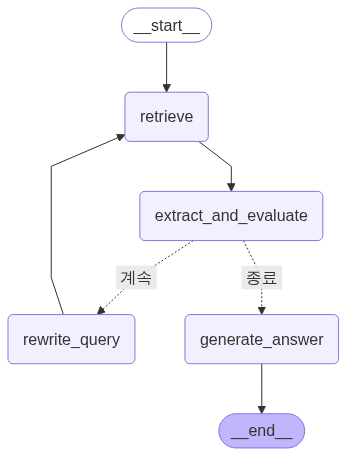

In [108]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# 그래프 생성
workflow = StateGraph(PersonalRagState)

# 노드 추가
workflow.add_node("retrieve", retrieve_documents)
workflow.add_node("extract_and_evaluate", extract_and_evaluate_information)
workflow.add_node("rewrite_query", rewrite_query)
workflow.add_node("generate_answer", generate_node_answer)


# 엣지 추가
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "extract_and_evaluate")

# 조건부 엣지 추가
workflow.add_conditional_edges(
    "extract_and_evaluate",
    should_continue,
    {
        "계속": "rewrite_query",
        "종료": "generate_answer"
    }
)
workflow.add_edge("rewrite_query", "retrieve")
workflow.add_edge("generate_answer", END)

# 그래프 컴파일
personal_law_agent = workflow.compile()

# 그래프 시각화
display(Image(personal_law_agent.get_graph().draw_mermaid_png()))

In [109]:
inputs = {"question": "개인정보 처리에 대한 동의를 받을 때 주의해야 할 점은 무엇인가요?"}
for output in personal_law_agent.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

---문서 검색---
"Node 'retrieve':"
("Value: {'documents': [Document(metadata={'chapter': '제3장 개인정보의 처리\\n         "
 "제1절 개인정보의 수집, 이용, 제공 등', 'name': '개인정보 보호법', 'source': 'data/개인정보 "
 "보호법(법률)(제19234호)(20240315).pdf'}, page_content='[법률정보]\\n다음 조항은 "
 '개인정보 보호법 제3장 개인정보의 처리\\n         제1절 개인정보의 수집, 이용, 제공 등에서 발췌한 '
 '내용입니다.\\n\\n[법률조항]\\n제22조의2(아동의 개인정보 보호) ① 개인정보처리자는 만 14세 미만 아동의 개인정보를 처리하기 '
 '위하여 이 법에 따\\n른 동의를 받아야 할 때에는 그 법정대리인의 동의를 받아야 하며, 법정대리인이 동의하였는지를 확인하여야 '
 '한다.\\n② 제1항에도 불구하고 법정대리인의 동의를 받기 위하여 필요한 최소한의 정보로서 대통령령으로 정하는 정보는\\n법정대리인의 '
 '동의 없이 해당 아동으로부터 직접 수집할 수 있다.\\n③ 개인정보처리자는 만 14세 미만의 아동에게 개인정보 처리와 관련한 사항의 고지 '
 '등을 할 때에는 이해하기 쉬운\\n양식과 명확하고 알기 쉬운 언어를 사용하여야 한다.\\n④ 제1항부터 제3항까지에서 규정한 사항 외에 '
 '동의 및 동의 확인 방법 등에 필요한 사항은 대통령령으로 정한다.\\n[본조신설 2023. 3. 14.]\\n \\n         '
 "제2절 개인정보의 처리 제한'), Document(metadata={'chapter': '제3장 개인정보의 처리\\n         "
 "제1절 개인정보의 수집, 이용, 제공 등', 'name': '개인정보 보호법', 'source': 'data/개인정보 "
 "보호법(법률)(제19234호)(20240315).pd

In [110]:
print(value['node_answer'])

# 개인정보 처리에 대한 동의를 받을 때 주의해야 할 점

## 1. 직접적인 답변
개인정보 처리에 대한 동의를 받을 때는 특히 만 14세 미만 아동의 경우 법정대리인의 동의를 받아야 하며, 동의 여부를 확인해야 합니다. 또한, 동의를 받을 때는 정보주체에게 제공받는 자, 이용 목적, 제공하는 개인정보의 항목, 보유 및 이용 기간, 동의 거부 권리 및 불이익 내용을 명확히 알려야 합니다.

## 2. 관련 법률 조항 및 해석
- **법정대리인의 동의**: 만 14세 미만 아동의 개인정보를 처리하기 위해서는 법정대리인의 동의를 받아야 하며, 동의 여부를 확인해야 합니다 (출처: 개인정보 보호법 제22조의2).
- **고지 의무**: 아동에게 개인정보 처리와 관련한 사항을 고지할 때에는 이해하기 쉬운 양식과 명확하고 알기 쉬운 언어를 사용해야 합니다 (출처: 개인정보 보호법 제22조의2).
- **동의 내용**: 동의를 받을 때는 정보주체에게 제공받는 자, 이용 목적, 제공하는 개인정보의 항목, 보유 및 이용 기간, 동의 거부 권리 및 불이익 내용을 알려야 합니다 (출처: 개인정보 보호법 제17조).
- **동의 거부 권리**: 정보주체는 개인정보 제공에 대한 동의를 거부할 권리가 있으며, 동의 거부 시 불이익이 있을 수 있습니다 (출처: 개인정보 보호법 제17조).

## 3. 추가 설명 또는 예시
예를 들어, 만약 한 기업이 아동의 개인정보를 수집하고자 할 경우, 해당 아동의 부모나 법정대리인에게 동의를 요청해야 하며, 이때 아동이 이해할 수 있는 방식으로 개인정보 처리의 목적과 내용을 설명해야 합니다. 또한, 동의를 받을 때는 동의의 변경 사항에 대해서도 정보주체에게 알려야 합니다 (출처: 개인정보 보호법 제17조).

## 4. 결론 및 요약
개인정보 처리에 대한 동의를 받을 때는 법정대리인의 동의를 필수적으로 받아야 하며, 정보주체에게 필요한 모든 정보를 명확히 고지해야 합니다. 이러한 절차를 준수하지 않을 경우 법적 문제가 발생할 수 있으므로, 개인정보

`(2) 근로기준법 RAG 에이전트`

In [111]:
# 근로기준법
class LaborRagState(CorrectiveRagState):
    rewritten_query: str   # 재작성한 질문 
    extracted_info: Optional[ExtractedInformation]   # 추출된 정보 조각 
    node_answer: Optional[str]

In [112]:
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal

def retrieve_documents(state: LaborRagState) -> LaborRagState:
    print("---문서 검색---")
    query = state.get("rewritten_query", state["question"])
    docs = labor_law_search.invoke(query)
    return {"documents": docs}

def extract_and_evaluate_information(state: LaborRagState) -> LaborRagState:
    print("---정보 추출 및 평가---")
    extracted_strips = []

    for doc in state["documents"]:
        extract_prompt = ChatPromptTemplate.from_messages([
            ("system", """당신은 근로기준법 전문가입니다. 주어진 문서에서 질문과 관련된 주요 사실과 정보를 3~5개 정도 추출하세요. 
            각 추출된 정보에 대해 다음 두 가지 측면을 0에서 1 사이의 점수로 평가하세요:
            1. 질문과의 관련성
            2. 답변의 충실성 (질문에 대한 완전하고 정확한 답변을 제공할 수 있는 정도)
            
            추출 형식:
            1. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            2. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            ...
            
            마지막으로, 추출된 정보를 종합하여 질문에 대한 전반적인 답변 가능성을 0에서 1 사이의 점수로 평가하세요."""),
            ("human", "[질문]\n{question}\n\n[문서 내용]\n{document_content}")
        ])

        extract_llm = llm.with_structured_output(ExtractedInformation)

        extracted_data = extract_llm.invoke(extract_prompt.format(
            question=state["question"],
            document_content=doc.page_content
        ))

        if extracted_data.query_relevance < 0.8:
            continue

        for strip in extracted_data.strips:
            if strip.relevance_score > 0.7 and strip.faithfulness_score > 0.7:
                extracted_strips.append(strip)

    return {
        "extracted_info": extracted_strips,
        "num_generations": state.get("num_generations", 0) + 1
    }

def rewrite_query(state: LaborRagState) -> LaborRagState:
    print("---쿼리 재작성---")

    rewrite_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 근로기준법 전문가입니다. 주어진 원래 질문과 추출된 정보를 바탕으로, 더 관련성 있고 충실한 정보를 찾기 위해 검색 쿼리를 개선해주세요.

        다음 사항을 고려하여 검색 쿼리를 개선하세요:
        1. 원래 질문의 핵심 요소
        2. 추출된 정보의 관련성 점수
        3. 추출된 정보의 충실성 점수
        4. 부족한 정보나 더 자세히 알아야 할 부분

        개선된 검색 쿼리 작성 단계:
        1. 2-3개의 검색 쿼리를 제안하세요.
        2. 각 쿼리는 구체적이고 간결해야 합니다(5-10 단어 사이).
        3. 근로기준법과 관련된 전문 용어를 적절히 활용하세요.
        4. 각 쿼리 뒤에는 해당 쿼리를 제안한 이유를 간단히 설명하세요.

        출력 형식:
        1. [개선된 검색 쿼리 1]
        - 이유: [이 쿼리를 제안한 이유 설명]
        2. [개선된 검색 쿼리 2]
        - 이유: [이 쿼리를 제안한 이유 설명]
        3. [개선된 검색 쿼리 3]
        - 이유: [이 쿼리를 제안한 이유 설명]

        마지막으로, 제안된 쿼리 중 가장 효과적일 것 같은 쿼리를 선택하고 그 이유를 설명하세요."""),
        ("human", "원래 질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 개선된 검색 쿼리를 작성해주세요.")
    ])

    extracted_info_str = "\n".join([strip.content for strip in state["extracted_info"]])
    
    rewrite_llm = llm.with_structured_output(RefinedQuestion)

    response = rewrite_llm.invoke(rewrite_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))
    
    return {"rewritten_query": response.question_refined}

def generate_node_answer(state: LaborRagState) -> LaborRagState:
    print("---답변 생성---")

    answer_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 근로기준법 전문가입니다. 주어진 질문과 추출된 정보를 바탕으로 답변을 생성해주세요. 
        답변은 마크다운 형식으로 작성하며, 각 정보의 출처를 명확히 표시해야 합니다. 
        답변 구조:
        1. 질문에 대한 직접적인 답변
        2. 관련 법률 조항 및 해석
        3. 추가 설명 또는 예시 (필요한 경우)
        4. 결론 및 요약
        각 섹션에서 사용된 정보의 출처를 괄호 안에 명시하세요. 예: (출처: 근로기준법 제15조)"""),
        ("human", "질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 최종 답변을 작성해주세요.")
    ])

    extracted_info_str = "\n".join([f"내용: {strip.content}\n출처: {strip.source}\n관련성: {strip.relevance_score}\n충실성: {strip.faithfulness_score}" for strip in state["extracted_info"]])

    node_answer = llm.invoke(answer_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))

    return {"node_answer": node_answer.content}

def should_continue(state: LaborRagState) -> Literal["계속", "종료"]:
    if state["num_generations"] >= 2:
        return "종료"
    if len(state["extracted_info"]) >= 1:
        return "종료"
    return "계속"

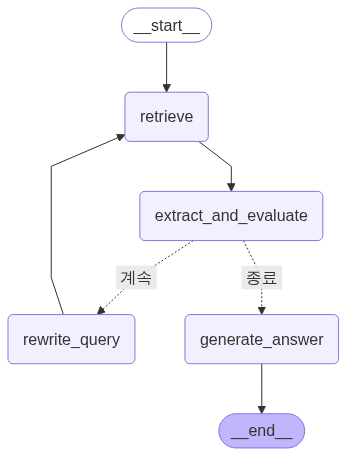

In [113]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# 그래프 생성
workflow = StateGraph(LaborRagState)

# 노드 추가
workflow.add_node("retrieve", retrieve_documents)
workflow.add_node("extract_and_evaluate", extract_and_evaluate_information)
workflow.add_node("rewrite_query", rewrite_query)
workflow.add_node("generate_answer", generate_node_answer)


# 엣지 추가
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "extract_and_evaluate")

# 조건부 엣지 추가
workflow.add_conditional_edges(
    "extract_and_evaluate",
    should_continue,
    {
        "계속": "rewrite_query",
        "종료": "generate_answer"
    }
)
workflow.add_edge("rewrite_query", "retrieve")
workflow.add_edge("generate_answer", END)

# 그래프 컴파일
labor_law_agent = workflow.compile()

# 그래프 시각화
display(Image(labor_law_agent.get_graph().draw_mermaid_png()))

In [114]:
inputs = {"question": "근로계약 체결할 때 주의해야 할 점은 무엇인가요?"}
for output in labor_law_agent.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

---문서 검색---
"Node 'retrieve':"
("Value: {'documents': [Document(metadata={'chapter': '제5장 여성과 소년', 'name': "
 "'근로기준법', 'source': "
 "'data/근로기준법(법률)(제18176호)(20211119).pdf'}, "
 "page_content='[법률정보]\\n다음 조항은 근로기준법 제5장 여성과 소년에서 발췌한 "
 '내용입니다.\\n\\n[법률조항]\\n제67조(근로계약) ① 친권자나 후견인은 미성년자의 근로계약을 대리할 수 없다.\\n② 친권자, '
 '후견인 또는 고용노동부장관은 근로계약이 미성년자에게 불리하다고 인정하는 경우에는 이를 해지할 수\\n있다.<개정 2010. 6. '
 '4.>\\n③ 사용자는 18세 미만인 사람과 근로계약을 체결하는 경우에는 제17조에 따른 근로조건을 서면(「전자문서 및 전\\n자거래 '
 '기본법」 제2조제1호에 따른 전자문서를 포함한다)으로 명시하여 교부하여야 한다.<신설 2007. 7. 27., 2020.\\n5. '
 "26., 2021. 1. 5.>'), Document(metadata={'chapter': '제1장 총칙', 'name': "
 "'근로기준법', 'source': "
 "'data/근로기준법(법률)(제18176호)(20211119).pdf'}, "
 "page_content='[법률정보]\\n다음 조항은 근로기준법 제1장 총칙에서 발췌한 "
 '내용입니다.\\n\\n[법률조항]\\n제5조(근로조건의 준수) 근로자와 사용자는 각자가 단체협약, 취업규칙과 근로계약을 지키고 성실하게 '
 "이행할 의무가\\n있다.')]}")

----------------------------------------------------------

---정보 추출 및 평가---
"Node 'extract_and_

In [116]:
print(value['node_answer'])

# 근로계약 체결 시 주의해야 할 점

## 1. 직접적인 답변
근로계약을 체결할 때 주의해야 할 점은 근로조건을 명확히 서면으로 명시하고, 특히 미성년자와의 계약 시 법적 요건을 준수하는 것입니다.

## 2. 관련 법률 조항 및 해석
- **근로조건 서면 명시**: 사용자는 18세 미만인 근로자와 근로계약을 체결할 경우, 근로조건을 서면으로 명시하여 교부해야 합니다 (출처: 근로기준법 제67조 ③).
- **미성년자의 계약 대리**: 친권자나 후견인은 미성년자의 근로계약을 대리할 수 없습니다 (출처: 근로기준법 제67조 ①).
- **계약 해지 권한**: 근로계약이 미성년자에게 불리하다고 인정되는 경우, 친권자나 후견인 또는 고용노동부장관은 이를 해지할 수 있습니다 (출처: 근로기준법 제67조 ②).
- **계약 이행 의무**: 근로자와 사용자는 각자가 단체협약, 취업규칙과 근로계약을 지키고 성실하게 이행할 의무가 있습니다 (출처: 근로기준법 제5조).

## 3. 추가 설명 또는 예시
근로계약 체결 시, 근로조건을 명확히 하고 이를 준수해야 하며, 특히 미성년자와의 계약에서는 법적 요건을 철저히 확인해야 합니다. 예를 들어, 17세의 청소년을 고용할 경우, 근로조건을 서면으로 제공하고, 친권자의 동의 없이 계약을 체결할 수 없음을 유의해야 합니다.

## 4. 결론 및 요약
근로계약 체결 시에는 근로조건을 명확히 서면으로 명시하고, 미성년자와의 계약에 대한 법적 요건을 준수하는 것이 중요합니다. 이를 통해 법적 분쟁을 예방하고, 근로자의 권리를 보호할 수 있습니다.


`(3) 주택임대차보호법 RAG 에이전트`

In [117]:
# 주택임대차보호법
class HousingRagState(CorrectiveRagState):
    rewritten_query: str   # 재작성한 질문 
    extracted_info: Optional[ExtractedInformation]   # 추출된 정보 조각 
    node_answer: Optional[str] 

In [118]:
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal

def retrieve_documents(state: HousingRagState) -> HousingRagState:
    print("---문서 검색---")
    query = state.get("rewritten_query", state["question"])
    docs = housing_law_search.invoke(query)
    return {"documents": docs}

def extract_and_evaluate_information(state: HousingRagState) -> HousingRagState:
    print("---정보 추출 및 평가---")
    extracted_strips = []

    for doc in state["documents"]:
        extract_prompt = ChatPromptTemplate.from_messages([
            ("system", """당신은 주택임대차보호법 전문가입니다. 주어진 문서에서 질문과 관련된 주요 사실과 정보를 3~5개 정도 추출하세요. 
            각 추출된 정보에 대해 다음 두 가지 측면을 0에서 1 사이의 점수로 평가하세요:
            1. 질문과의 관련성
            2. 답변의 충실성 (질문에 대한 완전하고 정확한 답변을 제공할 수 있는 정도)
            
            추출 형식:
            1. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            2. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            ...
            
            마지막으로, 추출된 정보를 종합하여 질문에 대한 전반적인 답변 가능성을 0에서 1 사이의 점수로 평가하세요."""),
            ("human", "[질문]\n{question}\n\n[문서 내용]\n{document_content}")
        ])

        extract_llm = llm.with_structured_output(ExtractedInformation)

        extracted_data = extract_llm.invoke(extract_prompt.format(
            question=state["question"],
            document_content=doc.page_content
        ))

        if extracted_data.query_relevance < 0.8:
            continue

        for strip in extracted_data.strips:
            if strip.relevance_score > 0.7 and strip.faithfulness_score > 0.7:
                extracted_strips.append(strip)

    return {
        "extracted_info": extracted_strips,
        "num_generations": state.get("num_generations", 0) + 1
    }

def rewrite_query(state: HousingRagState) -> HousingRagState:
    print("---쿼리 재작성---")

    rewrite_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 주택임대차보호법 전문가입니다. 주어진 원래 질문과 추출된 정보를 바탕으로, 더 관련성 있고 충실한 정보를 찾기 위해 검색 쿼리를 개선해주세요.

        다음 사항을 고려하여 검색 쿼리를 개선하세요:
        1. 원래 질문의 핵심 요소
        2. 추출된 정보의 관련성 점수
        3. 추출된 정보의 충실성 점수
        4. 부족한 정보나 더 자세히 알아야 할 부분

        개선된 검색 쿼리 작성 단계:
        1. 2-3개의 검색 쿼리를 제안하세요.
        2. 각 쿼리는 구체적이고 간결해야 합니다(5-10 단어 사이).
        3. 주택임대차보호법과 관련된 전문 용어를 적절히 활용하세요.
        4. 각 쿼리 뒤에는 해당 쿼리를 제안한 이유를 간단히 설명하세요.

        출력 형식:
        1. [개선된 검색 쿼리 1]
        - 이유: [이 쿼리를 제안한 이유 설명]
        2. [개선된 검색 쿼리 2]
        - 이유: [이 쿼리를 제안한 이유 설명]
        3. [개선된 검색 쿼리 3]
        - 이유: [이 쿼리를 제안한 이유 설명]

        마지막으로, 제안된 쿼리 중 가장 효과적일 것 같은 쿼리를 선택하고 그 이유를 설명하세요."""),
        ("human", "원래 질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 개선된 검색 쿼리를 작성해주세요.")
    ])

    extracted_info_str = "\n".join([strip.content for strip in state["extracted_info"]])
    
    rewrite_llm = llm.with_structured_output(RefinedQuestion)

    response = rewrite_llm.invoke(rewrite_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))
    
    return {"rewritten_query": response.question_refined}

def generate_node_answer(state: HousingRagState) -> HousingRagState:
    print("---답변 생성---")

    answer_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 주택임대차보호법 전문가입니다. 주어진 질문과 추출된 정보를 바탕으로 답변을 생성해주세요. 
        답변은 마크다운 형식으로 작성하며, 각 정보의 출처를 명확히 표시해야 합니다. 
        답변 구조:
        1. 질문에 대한 직접적인 답변
        2. 관련 법률 조항 및 해석
        3. 추가 설명 또는 예시 (필요한 경우)
        4. 결론 및 요약
        각 섹션에서 사용된 정보의 출처를 괄호 안에 명시하세요. 예: (출처: 주택임대차보호법 제15조)"""),
        ("human", "질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 최종 답변을 작성해주세요.")
    ])

    extracted_info_str = "\n".join([f"내용: {strip.content}\n출처: {strip.source}\n관련성: {strip.relevance_score}\n충실성: {strip.faithfulness_score}" for strip in state["extracted_info"]])

    node_answer = llm.invoke(answer_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))

    return {"node_answer": node_answer.content}

def should_continue(state: HousingRagState) -> Literal["계속", "종료"]:
    if state["num_generations"] >= 2:
        return "종료"
    if len(state["extracted_info"]) >= 1:
        return "종료"
    return "계속"

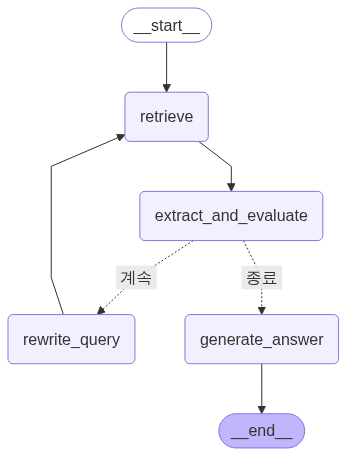

In [119]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# 그래프 생성
workflow = StateGraph(HousingRagState)

# 노드 추가
workflow.add_node("retrieve", retrieve_documents)
workflow.add_node("extract_and_evaluate", extract_and_evaluate_information)
workflow.add_node("rewrite_query", rewrite_query)
workflow.add_node("generate_answer", generate_node_answer)


# 엣지 추가
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "extract_and_evaluate")

# 조건부 엣지 추가
workflow.add_conditional_edges(
    "extract_and_evaluate",
    should_continue,
    {
        "계속": "rewrite_query",
        "종료": "generate_answer"
    }
)
workflow.add_edge("rewrite_query", "retrieve")
workflow.add_edge("generate_answer", END)

# 그래프 컴파일
housing_law_agent = workflow.compile()

# 그래프 시각화
display(Image(housing_law_agent.get_graph().draw_mermaid_png()))

In [120]:
inputs = {"question": "대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점은 무엇인가요?"}
for output in housing_law_agent.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

---문서 검색---
"Node 'retrieve':"
("Value: {'documents': [Document(metadata={'name': '주택임대차보호법', "
 "'source': 'data/주택임대차보호법(법률)(제19356호)(20230719).pdf'}, "
 "page_content='[법률정보]\\n다음 조항은 주택임대차보호법에서 발췌한 "
 '내용입니다.\\n\\n[법률조항]\\n제3조의7(임대인의 정보 제시 의무) 임대차계약을 체결할 때 임대인은 다음 각 호의 사항을 '
 '임차인에게 제시하여야 한\\n다.\\n1. 제3조의6제3항에 따른 해당 주택의 확정일자 부여일, 차임 및 보증금 등 정보. 다만, '
 '임대인이 임대차계약을 체결\\n하기 전에 제3조의6제4항에 따라 동의함으로써 이를 갈음할 수 있다. \\n2. 「국세징수법」 제108조에 '
 '따른 납세증명서 및 「지방세징수법」 제5조제2항에 따른 납세증명서. 다만, 임대인이 임\\n대차계약을 체결하기 전에 「국세징수법」 '
 '제109조제1항에 따른 미납국세와 체납액의 열람 및 「지방세징수법」 제 \\n6조제1항에 따른 미납지방세의 열람에 각각 동의함으로써 이를 '
 "갈음할 수 있다. \\n[본조신설 2023. 4. 18.]'), Document(metadata={'name': "
 "'주택임대차보호법', 'source': "
 "'data/주택임대차보호법(법률)(제19356호)(20230719).pdf'}, "
 "page_content='[법률정보]\\n다음 조항은 주택임대차보호법에서 발췌한 "
 '내용입니다.\\n\\n[법률조항]\\n제30조(주택임대차표준계약서 사용) 주택임대차계약을 서면으로 체결할 때에는 법무부장관이 '
 '국토교통부장관과 협의\\n하여 정하는 주택임대차표준계약서를 우선적으로 사용한다. 다만, 당사자가 다른 서식

In [121]:
print(value['node_answer'])

# 대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점

## 1. 직접적인 답변
대리인과 아파트 임대차 계약을 체결할 때는 대리인의 권한을 확인하고, 임대인의 정보 및 계약 조건을 명확히 이해하는 것이 중요합니다. 또한, 법적으로 요구되는 서류를 확인하고, 필요시 법률 전문가의 조언을 받는 것이 좋습니다.

## 2. 관련 법률 조항 및 해석
- **임대인의 정보 제시 의무**: 임대인은 임대차계약을 체결할 때 임차인에게 주택의 확정일자 부여일, 차임 및 보증금 등의 정보를 제시해야 합니다 (출처: 주택임대차보호법 제3조의7).
- **세금 체납 여부 확인**: 임대인은 납세증명서를 임차인에게 제시해야 하며, 이를 통해 임대인의 세금 체납 여부를 확인할 수 있습니다 (출처: 주택임대차보호법 제3조의7).
- **표준계약서 사용**: 주택임대차계약을 서면으로 체결할 때에는 법무부장관이 국토교통부장관과 협의하여 정하는 주택임대차표준계약서를 우선적으로 사용해야 합니다 (출처: 주택임대차보호법 제30조).

## 3. 추가 설명 또는 예시
- **대리인의 권한 확인**: 대리인과 계약을 체결할 때, 대리인이 실제로 임대인을 대신할 수 있는 권한이 있는지를 확인해야 합니다. 이를 위해 대리권 위임장을 요구할 수 있습니다.
- **계약서 조항 이해**: 계약서의 모든 조항을 충분히 이해하고 확인해야 하며, 불명확한 부분은 반드시 질문하여 명확히 해야 합니다. 예를 들어, 계약 해지 조건이나 보증금 반환 조건 등을 명확히 이해하는 것이 중요합니다.

## 4. 결론 및 요약
대리인과 아파트 임대차 계약을 체결할 때는 대리인의 권한을 확인하고, 임대인의 정보 및 계약 조건을 충분히 이해하는 것이 필수적입니다. 법적으로 요구되는 서류를 확인하고, 필요시 법률 전문가의 조언을 받는 것이 좋습니다. 이러한 절차를 통해 불필요한 분쟁을 예방할 수 있습니다.


`(4) 웹 검색 기반 RAG 에이전트`

In [123]:
# 웹 검색 도구 
class SearchRagState(CorrectiveRagState):
    rewritten_query: str   # 재작성한 질문 
    extracted_info: Optional[ExtractedInformation]   # 추출된 정보 조각 
    node_answer: Optional[str] 

In [124]:
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal

def retrieve_documents(state: SearchRagState) -> SearchRagState:
    print("---문서 검색---")
    query = state.get("rewritten_query", state["question"])
    docs = web_search.invoke(query)
    return {"documents": docs}

def extract_and_evaluate_information(state: SearchRagState) -> SearchRagState:
    print("---정보 추출 및 평가---")
    extracted_strips = []

    for doc in state["documents"]:
        extract_prompt = ChatPromptTemplate.from_messages([
            ("system", """당신은 인터넷 정보 검색 전문가입니다. 주어진 문서에서 질문과 관련된 주요 사실과 정보를 3~5개 정도 추출하세요. 
            각 추출된 정보에 대해 다음 두 가지 측면을 0에서 1 사이의 점수로 평가하세요:
            1. 질문과의 관련성
            2. 답변의 충실성 (질문에 대한 완전하고 정확한 답변을 제공할 수 있는 정도)
            
            추출 형식:
            1. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            2. [추출된 정보]
            - 관련성 점수: [0-1 사이의 점수]
            - 충실성 점수: [0-1 사이의 점수]
            ...
            
            마지막으로, 추출된 정보를 종합하여 질문에 대한 전반적인 답변 가능성을 0에서 1 사이의 점수로 평가하세요."""),
            ("human", "[질문]\n{question}\n\n[문서 내용]\n{document_content}")
        ])

        extract_llm = llm.with_structured_output(ExtractedInformation)

        extracted_data = extract_llm.invoke(extract_prompt.format(
            question=state["question"],
            document_content=doc.page_content
        ))

        if extracted_data.query_relevance < 0.8:
            continue

        for strip in extracted_data.strips:
            if strip.relevance_score > 0.7 and strip.faithfulness_score > 0.7:
                extracted_strips.append(strip)

    return {
        "extracted_info": extracted_strips,
        "num_generations": state.get("num_generations", 0) + 1
    }

def rewrite_query(state: SearchRagState) -> SearchRagState:
    print("---쿼리 재작성---")

    rewrite_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 인터넷 정보 검색 전문가입니다. 주어진 원래 질문과 추출된 정보를 바탕으로, 더 관련성 있고 충실한 정보를 찾기 위해 검색 쿼리를 개선해주세요.

        다음 사항을 고려하여 검색 쿼리를 개선하세요:
        1. 원래 질문의 핵심 요소
        2. 추출된 정보의 관련성 점수
        3. 추출된 정보의 충실성 점수
        4. 부족한 정보나 더 자세히 알아야 할 부분

        개선된 검색 쿼리 작성 단계:
        1. 2-3개의 검색 쿼리를 제안하세요.
        2. 각 쿼리는 구체적이고 간결해야 합니다(5-10 단어 사이).
        3. 질문과 관련된 전문 용어를 적절히 활용하세요.
        4. 각 쿼리 뒤에는 해당 쿼리를 제안한 이유를 간단히 설명하세요.

        출력 형식:
        1. [개선된 검색 쿼리 1]
        - 이유: [이 쿼리를 제안한 이유 설명]
        2. [개선된 검색 쿼리 2]
        - 이유: [이 쿼리를 제안한 이유 설명]
        3. [개선된 검색 쿼리 3]
        - 이유: [이 쿼리를 제안한 이유 설명]

        마지막으로, 제안된 쿼리 중 가장 효과적일 것 같은 쿼리를 선택하고 그 이유를 설명하세요."""),
        ("human", "원래 질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 개선된 검색 쿼리를 작성해주세요.")
    ])

    extracted_info_str = "\n".join([strip.content for strip in state["extracted_info"]])
    
    rewrite_llm = llm.with_structured_output(RefinedQuestion)

    response = rewrite_llm.invoke(rewrite_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))
    
    return {"rewritten_query": response.question_refined}

def generate_node_answer(state: SearchRagState) -> SearchRagState:
    print("---답변 생성---")

    answer_prompt = ChatPromptTemplate.from_messages([
        ("system", """당신은 인터넷 정보 검색 전문가입니다. 주어진 질문과 추출된 정보를 바탕으로 답변을 생성해주세요. 
        답변은 마크다운 형식으로 작성하며, 각 정보의 출처를 명확히 표시해야 합니다. 
        답변 구조:
        1. 질문에 대한 직접적인 답변
        2. 관련 출처 및 링크
        3. 추가 설명 또는 예시 (필요한 경우)
        4. 결론 및 요약
        각 섹션에서 사용된 정보의 출처를 괄호 안에 명시하세요. 예: (출처: 블로그 (www.blog.com/page/001)"""),
        ("human", "질문: {question}\n\n추출된 정보:\n{extracted_info}\n\n위 지침에 따라 최종 답변을 작성해주세요.")
    ])

    extracted_info_str = "\n".join([f"내용: {strip.content}\n출처: {strip.source}\n관련성: {strip.relevance_score}\n충실성: {strip.faithfulness_score}" for strip in state["extracted_info"]])

    node_answer = llm.invoke(answer_prompt.format(
        question=state["question"],
        extracted_info=extracted_info_str
    ))

    return {"node_answer": node_answer.content}

def should_continue(state: SearchRagState) -> Literal["계속", "종료"]:
    if state["num_generations"] >= 2:
        return "종료"
    if len(state["extracted_info"]) >= 1:
        return "종료"
    return "계속"

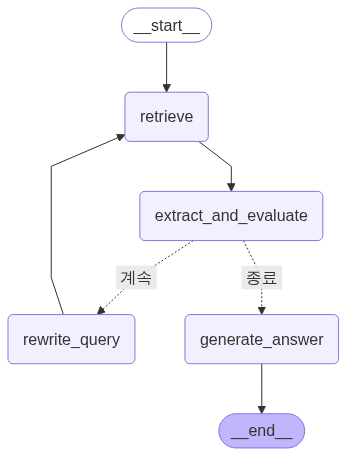

In [125]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# 그래프 생성
workflow = StateGraph(SearchRagState)

# 노드 추가
workflow.add_node("retrieve", retrieve_documents)
workflow.add_node("extract_and_evaluate", extract_and_evaluate_information)
workflow.add_node("rewrite_query", rewrite_query)
workflow.add_node("generate_answer", generate_node_answer)


# 엣지 추가
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "extract_and_evaluate")

# 조건부 엣지 추가
workflow.add_conditional_edges(
    "extract_and_evaluate",
    should_continue,
    {
        "계속": "rewrite_query",
        "종료": "generate_answer"
    }
)
workflow.add_edge("rewrite_query", "retrieve")
workflow.add_edge("generate_answer", END)

# 그래프 컴파일
search_web_agent = workflow.compile()

# 그래프 시각화
display(Image(search_web_agent.get_graph().draw_mermaid_png()))

In [129]:
inputs = {"question": "대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점은 무엇인가요?"}
for output in search_web_agent.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

---문서 검색---
"Node 'retrieve':"
("Value: {'documents': [Document(metadata={'source': 'web search', 'url': "
 "'https://www.khug.or.kr/jeonse/web/s03/s030203.jsp'}, "
 "page_content='<Document "
 'href="https://www.khug.or.kr/jeonse/web/s03/s030203.jsp"/>\\n대리인과 계약을 체결하는 '
 '경우 대리인이 해당 주택의 임대차계약을 체결할 수 있는 권한을 정확히 위임받고 있는지 확인해야 해요. ... 위임 범위를 벗어나 '
 "계약한다면 계약 자체가 무효가 되어 대항력을 잃게 될 수 있으니 주의해야 해요.\\n</Document>'), "
 "Document(metadata={'source': 'web search', 'url': "
 "'https://yklawyer.tistory.com/7564'}, page_content='<Document "
 'href="https://yklawyer.tistory.com/7564"/>\\n【주택임대차보호법】《임대차계약시 주의사항-대리인과 계약, '
 '공동소유자 중 1인과의 임대차계약 체결》〔윤경 변호사 더리드(The Lead) 법률사무소〕 1. 임대인의 대리인과 계약을 체결하는 경우 '
 "만일 임대인 본인이 아닌 임대인의 대리인과 계약을 진행할 때에는 위임장과 인감증명서를 확인하여\\n</Document>')]}")

----------------------------------------------------------

---정보 추출 및 평가---
"Node 'extract_and_evaluate':"
("Value: {'num_generations': 1, 'extracted_info': "
 "[InformationStrip(content='대리인이 해당 주택의 임대차계약을 체결할 수 있는 권한을 정확히 위임받고

In [130]:
print(value['node_answer'])

# 대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점

대리인과 아파트 임대차 계약을 체결할 때는 다음과 같은 점에 주의해야 합니다:

1. **대리인의 권한 확인**: 대리인이 해당 주택의 임대차계약을 체결할 수 있는 권한을 정확히 위임받았는지 확인해야 합니다. 대리인이 위임 범위를 벗어나 계약을 체결할 경우, 계약 자체가 무효가 되어 대항력을 잃게 될 수 있습니다. (출처: [한국주택금융공사](https://www.khug.or.kr/jeonse/web/s03/s030203.jsp))

2. **위임장 및 인감증명서 확인**: 임대인의 대리인과 계약을 체결할 때에는 반드시 위임장과 인감증명서를 확인해야 합니다. 이는 대리인의 신뢰성을 높이고, 계약의 법적 효력을 보장하는 데 중요합니다. (출처: 주택임대차보호법)

3. **임대인의 본인 확인**: 대리인과 계약을 체결할 경우, 임대인의 본인 확인이 중요합니다. 이는 계약의 유효성을 확보하고, 향후 발생할 수 있는 분쟁을 예방하는 데 도움이 됩니다. (출처: 주택임대차보호법)

## 결론 및 요약

대리인과 아파트 임대차 계약을 체결할 때는 대리인의 권한을 확인하고, 위임장 및 인감증명서를 검토하며, 임대인의 본인 확인을 철저히 해야 합니다. 이러한 절차를 통해 계약의 법적 효력을 확보하고, 불필요한 분쟁을 예방할 수 있습니다.


### 4-2. 질문 라우팅 
- 사용자의 질문을 분석하여 적절한 에이전트를 선택 (Adaptive RAG 적용)

In [131]:
from typing import Annotated
from operator import add

# 메인 그래프 상태 정의
class ResearchAgentState(TypedDict):
    question: str
    answers: Annotated[List[str], add]
    final_answer: str
    datasources: List[str]
    evaluation_report: Optional[dict]
    user_decision: Optional[str]

In [132]:
from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field

# 라우팅 결정을 위한 데이터 모델
class ToolSelector(BaseModel):
    """Routes the user question to the most appropriate tool."""
    tool: Literal["search_personal", "search_labor", "search_housing", "search_web"] = Field(
        description="Select one of the tools, based on the user's question.",
    )

class ToolSelectors(BaseModel):
    """Select the appropriate tools that are suitable for the user question."""
    tools: List[ToolSelector] = Field(
        description="Select one or more tools, based on the user's question.",
    )

# 구조화된 출력을 위한 LLM 설정
structured_llm_tool_selector = llm.with_structured_output(ToolSelectors)

# 라우팅을 위한 프롬프트 템플릿
system = dedent("""You are an AI assistant specializing in routing user questions to the appropriate tools.
Use the following guidelines:
- For questions specifically about legal provisions or articles of the privacy protection law (개인정보 보호법), use the search_personal tool.
- For questions specifically about legal provisions or articles of the labor law (근로기준법), use the search_labor tool.
- For questions specifically about legal provisions or articles of the housing law (주택임대차보호법), use the search_housing tool.
- For any other information, including questions related to these laws but not directly about specific legal provisions, or for the most up-to-date data, use the search_web tool.
Always choose all of the appropriate tools based on the user's question. 
If a question is about a law but doesn't seem to be asking about specific legal provisions, include both the relevant law search tool and the search_web tool.""")

route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

# 질문 라우터 정의
question_tool_router = route_prompt | structured_llm_tool_selector

# 테스트 실행
print(question_tool_router.invoke({"question": "근로계약 체결할 때 개인정보 취급 상의 유의사항은 무엇인가요?"}))
print(question_tool_router.invoke({"question": "법에서 정한 연차휴가 기준을 알려주세요."}))
print(question_tool_router.invoke({"question": "개인정보보호법에서 정한 가명정보의 정의는 무엇인가요?"}))

tools=[ToolSelector(tool='search_labor'), ToolSelector(tool='search_personal')]
tools=[ToolSelector(tool='search_labor'), ToolSelector(tool='search_web')]
tools=[ToolSelector(tool='search_personal')]


In [133]:
# 질문 라우팅 노드 
def analyze_question_tool_search(state: ResearchAgentState):
    question = state["question"]
    result = question_tool_router.invoke({"question": question})
    datasources = [tool.tool for tool in result.tools]
    return {"datasources": datasources}


def route_datasources_tool_search(state: ResearchAgentState) -> List[str]:
    datasources = set(state['datasources'])
    valid_sources = {"search_personal", "search_labor", "search_housing", "search_web"}
    
    if datasources.issubset(valid_sources):
        return list(datasources)
    
    return list(valid_sources)

In [134]:
# 노드 정의 
def personal_rag_node(state: PersonalRagState, input=ResearchAgentState) -> ResearchAgentState:
    print("--- 개인정보보호법 전문가 에이전트 시작 ---")
    question = state["question"]
    answer = personal_law_agent.invoke({"question": question})
    return {"answers": [answer["node_answer"]]}

def labor_rag_node(state: LaborRagState, input=ResearchAgentState) -> ResearchAgentState:
    print("--- 근로기준법 전문가 에이전트 시작 ---")
    question = state["question"]
    answer = labor_law_agent.invoke({"question": question})
    return {"answers": [answer["node_answer"]]}

def housing_rag_node(state: HousingRagState, input=ResearchAgentState) -> ResearchAgentState:
    print("--- 주택임대차보호법 전문가 에이전트 시작 ---")
    question = state["question"]
    answer = housing_law_agent.invoke({"question": question})
    return {"answers": [answer["node_answer"]]}

def web_rag_node(state: SearchRagState, input=ResearchAgentState) -> ResearchAgentState:
    print("--- 인터넷 검색 전문가 에이전트 시작 ---")
    question = state["question"]
    answer = search_web_agent.invoke({"question": question})
    return {"answers": [answer["node_answer"]]}


In [135]:
# 최종 답변 생성 노드
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

# RAG 프롬프트 정의
rag_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are an assistant answering questions based on provided documents. Follow these guidelines:

1. Use only information from the given documents.
2. If the document lacks relevant info, say "제공된 정보로는 충분한 답변을 할 수 없습니다."
3. Cite the source of information for each sentence in your answer. Use the following format:
    - For legal articles: "법률명 제X조 Y항"
    - For web sources: "출처 제목 (URL)"
4. Don't speculate or add information not in the documents.
5. Keep answers concise and clear.
6. Omit irrelevant information.
7. If multiple sources provide the same information, cite all relevant sources.
8. If information comes from multiple sources, combine them coherently while citing each source.

Example of citation usage:
"부동산 거래 시 계약서에 거래 금액을 명시해야 합니다 (부동산 거래신고 등에 관한 법률 제3조 1항). 또한, 계약 체결일로부터 30일 이내에 신고해야 합니다 (부동산 거래 신고 안내 블로그, https://example.com/realestate)."
"""
    ),
    ("human", "Answer the following question using these documents:\n\n[Documents]\n{documents}\n\n[Question]\n{question}"),
])

def answer_final(state: ResearchAgentState) -> ResearchAgentState:
    """
    Generate answer using the retrieved_documents
    """
    print("---최종 답변---")
    question = state["question"]
    documents = state.get("answers", [])
    if not isinstance(documents, list):
        documents = [documents]

    # 문서 내용을 문자열로 결합 
    documents_text = "\n\n".join(documents)

    # RAG generation
    rag_chain = rag_prompt | llm | StrOutputParser()
    generation = rag_chain.invoke({"documents": documents_text, "question": question})
    return {"final_answer": generation, "question":question}


# LLM Fallback 프롬프트 정의
fallback_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are an AI assistant helping with various topics. Follow these guidelines:

1. Provide accurate and helpful information to the best of your ability.
2. Express uncertainty when unsure; avoid speculation.
3. Keep answers concise yet informative.
4. Respond ethically and constructively.
5. Mention reliable general sources when applicable."""),
    ("human", "{question}"),
])

def llm_fallback(state: ResearchAgentState) -> ResearchAgentState:
    """
    Generate answer using the LLM without context
    """
    print("---Fallback 답변---")
    question = state["question"]
    
    # LLM chain
    llm_chain = fallback_prompt | llm | StrOutputParser()
    
    generation = llm_chain.invoke({"question": question})
    return {"final_answer": generation, "question":question}

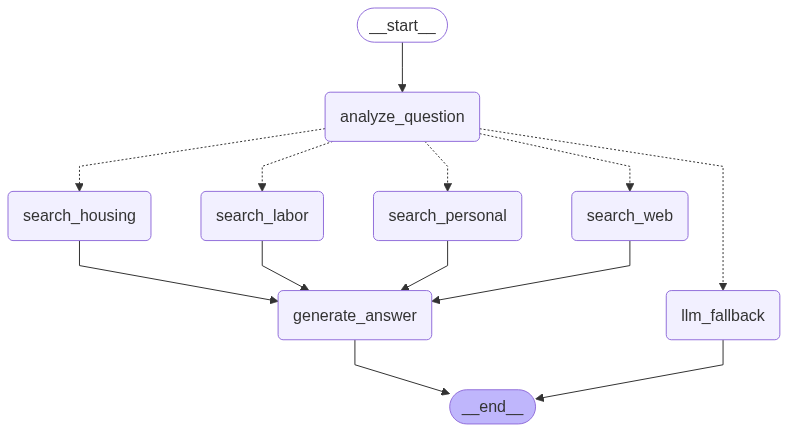

In [136]:
# 노드 정의를 딕셔너리로 관리
nodes = {
    "analyze_question": analyze_question_tool_search,
    "search_personal": personal_rag_node,
    "search_labor": labor_rag_node,
    "search_housing": housing_rag_node,
    "search_web": web_rag_node,
    "generate_answer": answer_final,
    "llm_fallback": llm_fallback
}

# 그래프 생성을 위한 StateGraph 객체를 정의
search_builder = StateGraph(ResearchAgentState)

# 노드 추가
for node_name, node_func in nodes.items():
    search_builder.add_node(node_name, node_func)

# 엣지 추가 (병렬 처리)
search_builder.add_edge(START, "analyze_question")
search_builder.add_conditional_edges(
    "analyze_question",
    route_datasources_tool_search,
    ["search_personal", "search_labor", "search_housing", "search_web", "llm_fallback"]
)

# 검색 노드들을 generate_answer에 연결
for node in ["search_personal", "search_labor", "search_housing", "search_web"]:
    search_builder.add_edge(node, "generate_answer")

search_builder.add_edge("generate_answer", END)
search_builder.add_edge("llm_fallback", END)

# 그래프 컴파일
rag_search_graph = search_builder.compile()

# 그래프 시각화 
display(Image(rag_search_graph.get_graph().draw_mermaid_png()))

In [137]:
inputs = {"question": "대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점은 무엇인가요?"}
for output in rag_search_graph.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

"Node 'analyze_question':"
"Value: {'datasources': ['search_housing', 'search_web']}"

----------------------------------------------------------

--- 인터넷 검색 전문가 에이전트 시작 ---
--- 주택임대차보호법 전문가 에이전트 시작 ---
---문서 검색---
---문서 검색---
---정보 추출 및 평가------정보 추출 및 평가---

---답변 생성---
---답변 생성---
"Node 'search_web':"
("Value: {'answers': ['# 대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점\\n\\n대리인과 아파트 임대차 계약을 "
 '체결할 때는 다음과 같은 점에 주의해야 합니다:\\n\\n1. **대리인의 권한 확인**: 대리인이 해당 주택의 임대차계약을 체결할 수 '
 '있는 권한을 정확히 위임받았는지 확인해야 합니다. 이는 계약의 유효성을 보장하는 중요한 단계입니다. (출처: '
 '[한국주택금융공사](https://www.khug.or.kr/jeonse/web/s03/s030203.jsp))\\n\\n2. **위임 '
 '범위 준수**: 대리인이 위임 범위를 벗어나 계약을 체결할 경우, 해당 계약은 무효가 되어 대항력을 잃게 될 수 있습니다. 따라서 위임의 '
 '범위를 명확히 이해하고 있어야 합니다. (출처: '
 '[한국주택금융공사](https://www.khug.or.kr/jeonse/web/s03/s030203.jsp))\\n\\n3. **위임장 '
 '및 인감증명서 확인**: 임대인의 대리인과 계약을 체결할 때에는 반드시 위임장과 인감증명서를 확인해야 합니다. 이는 대리인의 신뢰성을 '
 '높이고, 계약의 법적 효력을 확보하는 데 필수적입니다. (출처: 주택임대차보호법)\\n\\n4. **임대인의 본인 확인**: 대리인과 '
 '계약을 체결할 경우, 임대인의 본인 확인이 중요합니다. 이는 계

In [138]:
print(value['final_answer'])

대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점은 다음과 같습니다:

1. **대리인의 권한 확인**: 대리인이 해당 주택의 임대차계약을 체결할 수 있는 권한을 정확히 위임받았는지 확인해야 합니다. 이는 계약의 유효성을 보장하는 중요한 단계입니다 (출처: [한국주택금융공사](https://www.khug.or.kr/jeonse/web/s03/s030203.jsp)).

2. **위임 범위 준수**: 대리인이 위임 범위를 벗어나 계약을 체결할 경우, 해당 계약은 무효가 되어 대항력을 잃게 될 수 있습니다 (출처: [한국주택금융공사](https://www.khug.or.kr/jeonse/web/s03/s030203.jsp)).

3. **위임장 및 인감증명서 확인**: 임대인의 대리인과 계약을 체결할 때에는 반드시 위임장과 인감증명서를 확인해야 합니다. 이는 대리인의 신뢰성을 높이고, 계약의 법적 효력을 확보하는 데 필수적입니다 (출처: 주택임대차보호법).

4. **임대인의 본인 확인**: 대리인과 계약을 체결할 경우, 임대인의 본인 확인이 중요합니다. 이는 계약의 안전성을 높이는 데 기여합니다 (출처: 주택임대차보호법).

5. **임대인의 정보 제시 의무**: 임대인은 임대차계약을 체결할 때 임차인에게 해당 주택의 확정일자 부여일, 차임 및 보증금 등의 정보를 제시해야 하며, 이를 위반할 경우 법적 문제가 발생할 수 있습니다 (출처: 주택임대차보호법 제3조의7).

이러한 주의사항을 지키면 법적 문제를 예방하고, 원활한 계약 체결이 가능합니다.


# 5. 답변 평가 및 확인

### 5-1. 답변을 평가하는 ReAct 에이전트

In [139]:
from textwrap import dedent

evaluation_prompt = dedent("""
당신은 AI 어시스턴트가 생성한 답변을 평가하는 전문가입니다. 주어진 질문과 답변을 평가하고, 60점 만점으로 점수를 매기세요. 다음 기준을 사용하여 평가하십시오:

1. 정확성 (10점)
2. 관련성 (10점)
3. 완전성 (10점)
4. 인용 정확성 (10점)
5. 명확성과 간결성 (10점)
6. 객관성 (10점)

평가 과정:
1. 주어진 질문과 답변을 주의 깊게 읽으십시오.
2. 필요한 경우, 다음 도구를 사용하여 추가 정보를 수집하세요:
   - web_search: 웹 검색
   - personal_law_search: 개인정보보호법 검색
   - labor_law_search: 근로기준법 검색
   - housing_law_search: 주택임대차보호법 검색

   도구 사용 형식:
   Action: [tool_name]
   Action Input: [input for the tool]

3. 각 기준에 대해 1-10점 사이의 점수를 매기세요.
4. 총점을 계산하세요 (60점 만점).

출력 형식:
{
  "scores": {
    "accuracy": 0,
    "relevance": 0,
    "completeness": 0,
    "citation_accuracy": 0,
    "clarity_conciseness": 0,
    "objectivity": 0
  },
  "total_score": 0,
  "brief_evaluation": "간단한 평가 설명"
}

최종 출력에는 각 기준의 점수, 총점, 그리고 간단한 평가 설명만 포함하세요.
""")

In [140]:
tools

[StructuredTool(name='personal_law_search', description='개인정보보호법 법률 조항을 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.personal_law_search'>, func=<function personal_law_search at 0x32972f550>),
 StructuredTool(name='labor_law_search', description='근로기준법 법률 조항을 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.labor_law_search'>, func=<function labor_law_search at 0x32972f670>),
 StructuredTool(name='housing_law_search', description='주택임대차보호법 법률 조항을 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.housing_law_search'>, func=<function housing_law_search at 0x328c889d0>),
 StructuredTool(name='web_search', description='데이터베이스에 없는 정보 또는 최신 정보를 웹에서 검색합니다.', args_schema=<class 'langchain_core.utils.pydantic.web_search'>, func=<function web_search at 0x32972f4c0>)]

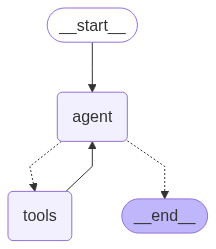

In [141]:
from langgraph.prebuilt import create_react_agent
from IPython.display import Image, display

# 그래프 생성 
answer_reviewer = create_react_agent(
    llm, 
    tools=tools, 
    state_modifier=evaluation_prompt,
    )

# 그래프 출력
display(Image(answer_reviewer.get_graph().draw_mermaid_png()))

In [142]:
# 그래프 실행
from langchain_core.messages import HumanMessage

messages = [HumanMessage(content=f"""[질문]\n\{value['question']}n\n[답변]\n{value['final_answer']}""")]
messages = answer_reviewer.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

[질문]
\대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점은 무엇인가요?n
[답변]
대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점은 다음과 같습니다:

1. **대리인의 권한 확인**: 대리인이 해당 주택의 임대차계약을 체결할 수 있는 권한을 정확히 위임받았는지 확인해야 합니다. 이는 계약의 유효성을 보장하는 중요한 단계입니다 (출처: [한국주택금융공사](https://www.khug.or.kr/jeonse/web/s03/s030203.jsp)).

2. **위임 범위 준수**: 대리인이 위임 범위를 벗어나 계약을 체결할 경우, 해당 계약은 무효가 되어 대항력을 잃게 될 수 있습니다 (출처: [한국주택금융공사](https://www.khug.or.kr/jeonse/web/s03/s030203.jsp)).

3. **위임장 및 인감증명서 확인**: 임대인의 대리인과 계약을 체결할 때에는 반드시 위임장과 인감증명서를 확인해야 합니다. 이는 대리인의 신뢰성을 높이고, 계약의 법적 효력을 확보하는 데 필수적입니다 (출처: 주택임대차보호법).

4. **임대인의 본인 확인**: 대리인과 계약을 체결할 경우, 임대인의 본인 확인이 중요합니다. 이는 계약의 안전성을 높이는 데 기여합니다 (출처: 주택임대차보호법).

5. **임대인의 정보 제시 의무**: 임대인은 임대차계약을 체결할 때 임차인에게 해당 주택의 확정일자 부여일, 차임 및 보증금 등의 정보를 제시해야 하며, 이를 위반할 경우 법적 문제가 발생할 수 있습니다 (출처: 주택임대차보호법 제3조의7).

이러한 주의사항을 지키면 법적 문제를 예방하고, 원활한 계약 체결이 가능합니다.
================================== Ai Message ==================================

{
  "scores": 

In [143]:
json.loads(m.content).keys()

dict_keys(['scores', 'total_score', 'brief_evaluation'])

In [144]:
print(json.loads(m.content)['total_score'])

59


### 5-2. 답변 평가 내용을 확인하는 HITL 추가

In [145]:
# 답변 평가하는 노드를 추가
def evaluate_answer_node(state:ResearchAgentState):
    question = state["question"]
    final_answer = state["final_answer"]

    messages = [HumanMessage(content=f"""[질문]\n\{question}n\n[답변]\n{final_answer}""")]
    response = answer_reviewer.invoke({"messages": messages})
    response_dict = json.loads(response['messages'][-1].content)

    return {"evaluation_report": response_dict, "question": question, "final_answer": final_answer}

# HITL 조건부 엣지 정의
def human_review(state: ResearchAgentState):
    print("\n현재 답변:")
    print(state['final_answer'])
    print("\n평가 결과:")
    print(f"총점: {state['evaluation_report']['total_score']}/60")
    print(state['evaluation_report']['brief_evaluation'])
    
    user_input = input("\n이 답변을 승인하시겠습니까? (y/n): ").lower()
    
    if user_input == 'y':
        return "approved"
    else:
        return "rejected"
    

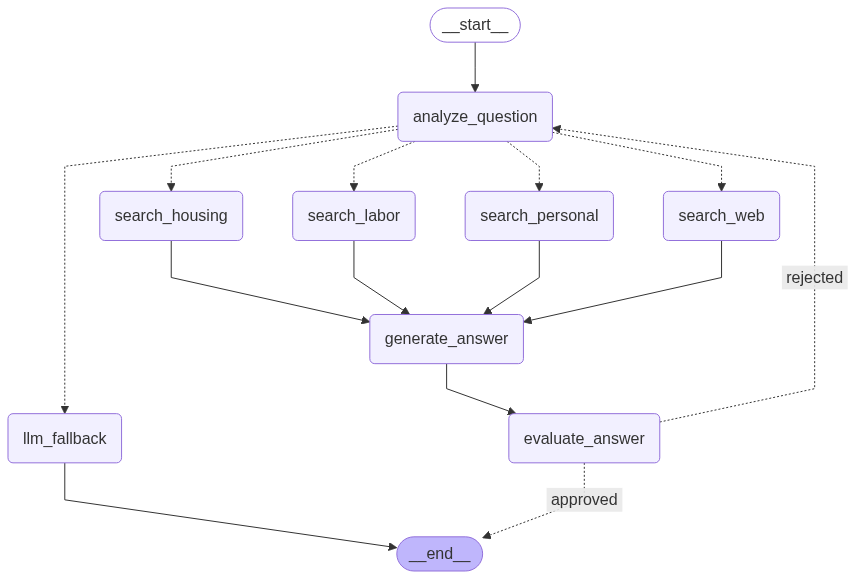

In [146]:
# 노드 정의를 딕셔너리로 관리
nodes = {
    "analyze_question": analyze_question_tool_search,
    "search_personal": personal_rag_node,
    "search_labor": labor_rag_node,
    "search_housing": housing_rag_node,
    "search_web": web_rag_node,
    "generate_answer": answer_final,
    "llm_fallback": llm_fallback,
    "evaluate_answer": evaluate_answer_node, 
}

# 그래프 생성을 위한 StateGraph 객체를 정의
search_builder = StateGraph(ResearchAgentState)

# 노드 추가
for node_name, node_func in nodes.items():
    search_builder.add_node(node_name, node_func)

# 엣지 추가 (병렬 처리)
search_builder.add_edge(START, "analyze_question")
search_builder.add_conditional_edges(
    "analyze_question",
    route_datasources_tool_search,
    ["search_personal", "search_labor", "search_housing", "search_web", "llm_fallback"]
)

# 검색 노드들을 generate_answer에 연결
for node in ["search_personal", "search_labor", "search_housing", "search_web"]:
    search_builder.add_edge(node, "generate_answer")

search_builder.add_edge("generate_answer", "evaluate_answer")

# HITL 결과에 따른 조건부 엣지 추가
search_builder.add_conditional_edges(
    "evaluate_answer",
    human_review,
    {
        "approved": END,
        "rejected": "analyze_question"  # 승인되지 않은 경우 질문 분석 단계로 돌아감
    }
)

search_builder.add_edge("llm_fallback", END)

# 그래프 컴파일
legal_rag_agent = search_builder.compile()

# 그래프 시각화 
display(Image(legal_rag_agent.get_graph().draw_mermaid_png()))

In [147]:
inputs = {"question": "대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점은 무엇인가요?"}
for output in legal_rag_agent.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

"Node 'analyze_question':"
"Value: {'datasources': ['search_housing', 'search_web']}"

----------------------------------------------------------

--- 인터넷 검색 전문가 에이전트 시작 ---
---문서 검색---
--- 주택임대차보호법 전문가 에이전트 시작 ---
---문서 검색---
---정보 추출 및 평가------정보 추출 및 평가---

---답변 생성---
---답변 생성---
"Node 'search_web':"
("Value: {'answers': ['# 대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점\\n\\n대리인과 아파트 임대차 계약을 "
 '체결할 때 주의해야 할 점은 다음과 같습니다:\\n\\n1. **대리인의 권한 확인**: 대리인이 해당 주택의 임대차계약을 체결할 수 '
 '있는 권한을 정확히 위임받았는지 확인해야 합니다. 대리인이 위임 범위를 벗어나 계약을 체결할 경우, 계약 자체가 무효가 되어 대항력을 '
 '잃게 될 수 있습니다. (출처: '
 '[한국주택금융공사](https://www.khug.or.kr/jeonse/web/s03/s030203.jsp))\\n\\n2. **위임장 '
 '및 인감증명서 확인**: 임대인의 대리인과 계약을 체결할 때에는 반드시 위임장과 인감증명서를 확인해야 합니다. 이는 대리인의 신뢰성을 '
 '높이고, 계약의 법적 효력을 보장하는 데 중요합니다. (출처: 주택임대차보호법)\\n\\n3. **임대인의 본인 확인**: 대리인과 '
 '계약을 체결할 경우, 임대인의 본인 확인이 중요합니다. 이는 대리인이 실제로 임대인의 권한을 가지고 있는지를 검증하는 과정입니다. '
 '(출처: 주택임대차보호법)\\n\\n## 결론 및 요약\\n\\n대리인과 아파트 임대차 계약을 체결할 때는 대리인의 권한을 확인하고, '
 '위임장 및 인감증명서를 검토하며, 임대인의 본인 확인을 철저히 해야

In [148]:
value

{'question': '대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점은 무엇인가요?',
 'final_answer': '대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점은 다음과 같습니다:\n\n1. **대리인의 권한 확인**: 대리인이 해당 주택의 임대차계약을 체결할 수 있는 권한을 정확히 위임받았는지 확인해야 합니다. 대리인이 위임 범위를 벗어나 계약을 체결할 경우, 계약 자체가 무효가 되어 대항력을 잃게 될 수 있습니다 (출처: [한국주택금융공사](https://www.khug.or.kr/jeonse/web/s03/s030203.jsp)).\n\n2. **위임장 및 인감증명서 확인**: 임대인의 대리인과 계약을 체결할 때에는 반드시 위임장과 인감증명서를 확인해야 합니다. 이는 대리인의 신뢰성을 높이고, 계약의 법적 효력을 보장하는 데 중요합니다 (출처: 주택임대차보호법).\n\n3. **임대인의 본인 확인**: 대리인과 계약을 체결할 경우, 임대인의 본인 확인이 중요합니다. 이는 대리인이 실제로 임대인의 권한을 가지고 있는지를 검증하는 과정입니다 (출처: 주택임대차보호법).\n\n4. **계약서의 모든 조항 검토**: 계약서의 모든 조항을 충분히 이해하고 검토해야 하며, 필요시 법률 전문가의 조언을 받는 것이 좋습니다 (출처: 대리인과 아파트 임대차 계약을 체결할 때 주의해야 할 점). \n\n이러한 절차를 통해 계약의 법적 효력을 확보하고, 불필요한 분쟁을 예방할 수 있습니다.',
 'evaluation_report': {'scores': {'accuracy': 9,
   'relevance': 10,
   'completeness': 9,
   'citation_accuracy': 8,
   'clarity_conciseness': 9,
   'objectivity': 10},
  'total_score': 55,
  'brief_evaluation': '답변은 대리인과 아파트 임대차 계약 시 주의해야 할 점을 잘 설명하고 있으며,

In [149]:
inputs = {"question": "개인정보 유출 시 기업이 취해야 할 법적 조치는 무엇인가요?"}
for output in legal_rag_agent.stream(inputs):
    for key, value in output.items():
        # 노드 출력
        pprint(f"Node '{key}':")
        pprint(f"Value: {value}", indent=2, width=80, depth=None)
    print("\n----------------------------------------------------------\n")

"Node 'analyze_question':"
"Value: {'datasources': ['search_personal', 'search_web']}"

----------------------------------------------------------

--- 개인정보보호법 전문가 에이전트 시작 ---
--- 인터넷 검색 전문가 에이전트 시작 ---
---문서 검색---
---문서 검색---
---정보 추출 및 평가------정보 추출 및 평가---

---답변 생성---
---답변 생성---
"Node 'search_web':"
("Value: {'answers': ['# 개인정보 유출 시 기업이 취해야 할 법적 조치\\n\\n개인정보 유출이 발생한 경우, 기업은 "
 '즉시 다음과 같은 법적 조치를 취해야 합니다:\\n\\n1. **신고 의무**: 개인정보 유출이 발생하면, 기업은 지체 없이 72시간 '
 '이내에 정보주체 및 관련 기관에 신고해야 합니다. 이는 개인정보 보호법 제34조에 명시된 의무입니다 (출처: 개인정보 보호법 '
 '제34조).\\n\\n2. **즉각적인 조치**: 기업이 개인정보 유출을 인지한 경우, 즉각적으로 취해야 할 조치가 필요합니다. 이는 '
 '유출된 정보의 범위와 피해를 최소화하기 위한 조치로, 내부 조사 및 피해자 통지 등이 포함될 수 있습니다 (출처: 문서 '
 '내용).\\n\\n## 관련 출처 및 링크\\n- 개인정보 보호법 제34조: '
 '[법제처](http://www.law.go.kr/법령/개인정보보호법/제34조)\\n- 문서 내용: [개인정보 보호 관련 '
 '자료](https://www.example.com)\\n\\n## 추가 설명\\n개인정보 유출 사건은 기업의 신뢰도에 큰 영향을 미칠 수 '
 '있으며, 법적 책임을 피하기 위해서는 신속하고 적절한 대응이 필수적입니다. 유출된 정보의 종류에 따라 추가적인 법적 조치가 필요할 수 '
 '있으며, 법률 자문을 받는 것이 좋습니다.\\n\\n## 

In [150]:
value

{'question': '개인정보 유출 시 기업이 취해야 할 법적 조치는 무엇인가요?',
 'final_answer': '개인정보 유출 시 기업이 취해야 할 법적 조치는 다음과 같습니다:\n\n1. **신고 의무**: 기업은 개인정보 유출이 발생하면 지체 없이 72시간 이내에 정보주체 및 관련 기관에 신고해야 합니다 (개인정보 보호법 제34조).\n\n2. **즉각적인 조치**: 유출 사실을 인지한 경우, 기업은 즉각적으로 유출된 정보의 범위와 피해를 최소화하기 위한 조치를 취해야 하며, 내부 조사 및 피해자 통지 등이 포함될 수 있습니다 (문서 내용).\n\n3. **유출 통지 의무**: 유출된 개인정보의 항목, 유출 시점과 경위, 피해 최소화 방법, 대응조치 및 피해 구제절차를 정보주체에게 알려야 합니다 (개인정보 보호법 제34조).\n\n4. **피해 최소화 조치**: 유출된 개인정보의 피해를 최소화하기 위한 대책을 마련하고 필요한 조치를 취해야 합니다 (개인정보 보호법 제34조).\n\n5. **신고 의무**: 유출의 유형, 경로 및 규모를 고려하여 보호위원회 또는 전문기관에 신고해야 합니다 (개인정보 보호법 제34조).\n\n이러한 조치를 신속히 이행하는 것은 정보주체의 권리를 보호하고 기업의 신뢰성을 유지하는 데 필수적입니다 (문서 내용).',
 'evaluation_report': {'scores': {'accuracy': 9,
   'relevance': 10,
   'completeness': 9,
   'citation_accuracy': 10,
   'clarity_conciseness': 8,
   'objectivity': 9},
  'total_score': 55,
  'brief_evaluation': '답변은 개인정보 유출 시 기업이 취해야 할 법적 조치를 잘 설명하고 있으며, 관련 법 조항을 인용하여 정확성을 높였습니다. 그러나 일부 내용이 중복되어 명확성과 간결성이 다소 떨어졌습니다.'}}

# 6. Gradio 챗봇

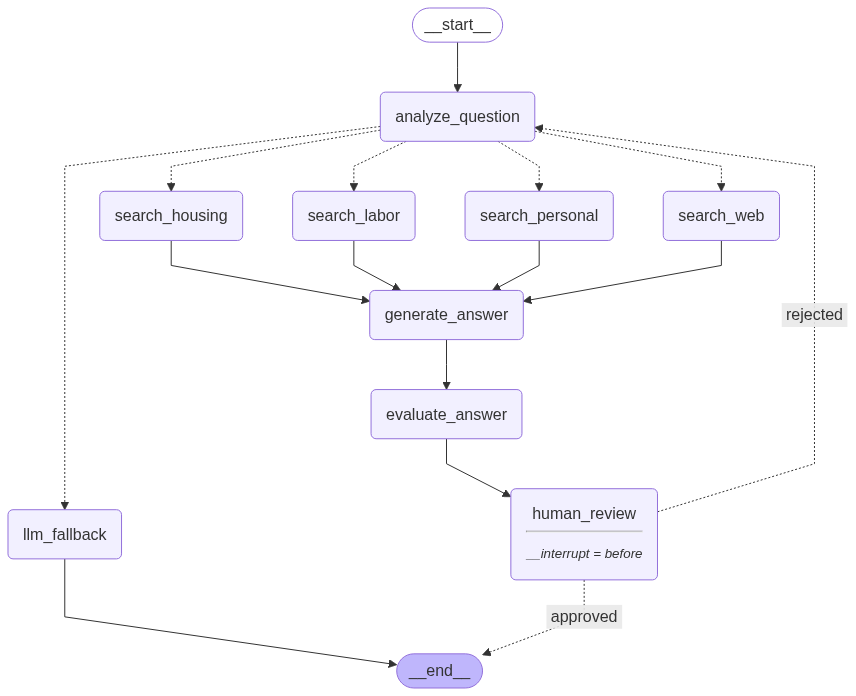

In [151]:
from langgraph.checkpoint.memory import MemorySaver

# HITL 노드로 변경 (그라디오에서 입력을 처리)
def human_review(state: ResearchAgentState):
    pass

# 그래프 생성을 위한 StateGraph 객체를 정의
search_builder = StateGraph(ResearchAgentState)

# 노드 추가
nodes = {
    "analyze_question": analyze_question_tool_search,
    "search_personal": personal_rag_node,
    "search_labor": labor_rag_node,
    "search_housing": housing_rag_node,
    "search_web": web_rag_node,
    "generate_answer": answer_final,
    "llm_fallback": llm_fallback,
    "evaluate_answer": evaluate_answer_node, 
    "human_review": human_review,
}

for node_name, node_func in nodes.items():
    search_builder.add_node(node_name, node_func)

# 엣지 추가 (병렬 처리)
search_builder.add_edge(START, "analyze_question")
search_builder.add_conditional_edges(
    "analyze_question",
    route_datasources_tool_search,
    ["search_personal", "search_labor", "search_housing", "search_web", "llm_fallback"]
)

# 검색 노드들을 generate_answer에 연결
for node in ["search_personal", "search_labor", "search_housing", "search_web"]:
    search_builder.add_edge(node, "generate_answer")

search_builder.add_edge("generate_answer", "evaluate_answer")
search_builder.add_edge("evaluate_answer", "human_review")

# HITL 결과에 따른 조건부 엣지 추가
search_builder.add_conditional_edges(
    "human_review",
    lambda x: "approved" if x.get("user_decision") == "approved" else "rejected",
    {
        "approved": END,
        "rejected": "analyze_question"
    }
)

search_builder.add_edge("llm_fallback", END)

# 메모리 추가
memory = MemorySaver()

# 그래프 컴파일 (Breakpoint 설정)
legal_rag_agent = search_builder.compile(checkpointer=memory, interrupt_before=["human_review"])

# 그래프 시각화 
display(Image(legal_rag_agent.get_graph().draw_mermaid_png()))

# 

In [152]:
import gradio as gr
import uuid
from typing import List, Tuple
from langgraph.checkpoint.memory import MemorySaver

# 메모리 사용 준비
memory = MemorySaver()
legal_rag_agent = search_builder.compile(checkpointer=memory, interrupt_before=["human_review"])

# 예시 질문들
example_questions = [
    "사업장에서 CCTV를 설치할 때 주의해야 할 법적 사항은 무엇인가요?",
    "전월세 계약 갱신 요구권의 행사 기간과 조건은 어떻게 되나요?",
    "개인정보 유출 시 기업이 취해야 할 법적 조치는 무엇인가요?",
]

# 챗봇 클래스 생성
class ChatBot:
    def __init__(self):
        self.thread_id = str(uuid.uuid4())
        self.user_decision = False

    def process_message(self, message: str) -> str:
        try:
            config = {"configurable": {"thread_id": self.thread_id}}
            
            if not self.user_decision:
                # Breakpoint 까지 먼저 실행
                inputs = {"question": message}
                legal_rag_agent.invoke(inputs, config=config)

                # Breakpoint에서 현재 상태를 출력하고, 사용자의 승인 여부를 입력받음 
                current_state = legal_rag_agent.get_state(config)
                print("Current state:", current_state)
                
                final_answer = current_state.values.get("final_answer", "No answer available")
                evaluation_report = current_state.values.get('evaluation_report', {'total_score': 0, 'brief_evaluation': 'No evaluation available'})
                
                response = f"""현재 답변:
            {final_answer}

            평가 결과:
            총점: {evaluation_report.get('total_score', 0)}/60
            {evaluation_report.get('brief_evaluation', 'No evaluation available')}

            이 답변을 승인하시겠습니까? (y/n): """
                
                # 사용자 승인 여부를 True로 변경 
                self.user_decision = True
                return response
                
            else:
                # 사용자 입력에 따라 다음 경로를 선택
                user_decision = message.lower()
                if user_decision == 'y':
                    self.user_decision = False # 초기화 
                    # 상태 업데이트 - 질문을 수정하여 업데이트
                    legal_rag_agent.update_state(config, {"user_decision": "approved"})
                    # 나머지 작업을 이어서 진행 
                    legal_rag_agent.invoke(None, config=config)
                    # 작업이 종료되고 최종 상태의 메시지를 출력 
                    current_state = legal_rag_agent.get_state(config)
                    print("Final state:", current_state)
                    return current_state.values.get("final_answer", "No final answer available")
                else:
                    self.user_decision = False # 초기화 
                    # 상태 업데이트 - 질문을 수정하여 업데이트
                    legal_rag_agent.update_state(config, {"user_decision": "rejected"})
                    # 나머지 작업을 이어서 진행 
                    legal_rag_agent.invoke(None, config=config)
                    # Breakpoint에서 현재 상태를 출력하고, 사용자의 승인 여부를 입력받음 
                    current_state = legal_rag_agent.get_state(config)
                    print("Revised state:", current_state)
                    
                    final_answer = current_state.values.get("final_answer", "No answer available")
                    evaluation_report = current_state.values.get('evaluation_report', {'total_score': 0, 'brief_evaluation': 'No evaluation available'})
                    
                    response = f"""다시 생성한 답변:
                {final_answer}

                평가 결과:
                총점: {evaluation_report.get('total_score', 0)}/60
                {evaluation_report.get('brief_evaluation', 'No evaluation available')}

                이 답변을 승인하시겠습니까? (y/n): """
                    
                    # 사용자 승인 여부를 True로 변경 
                    self.user_decision = True
                    return response

        except Exception as e:
            print(f"Error occurred: {str(e)}")
            return "죄송합니다. 응답을 생성하는 동안 오류가 발생했습니다. 다시 시도해 주세요."

    def chat(self, message: str, history: List[Tuple[str, str]]) -> str:
        print(f"Thread ID: {self.thread_id}")
        response = self.process_message(message)
        return response

chatbot = ChatBot()

# ChatInterface 생성
demo = gr.ChatInterface(
    fn=chatbot.chat,
    title="생활법률 AI 어시스턴트",
    description="주택임대차보호법, 근로기준법, 개인정보보호법 관련 질문에 답변해 드립니다.",
    examples=example_questions,
    theme=gr.themes.Soft()
)

# Gradio 앱 실행
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Thread ID: 62286f7e-33e0-4848-a62d-343627f78200
--- 인터넷 검색 전문가 에이전트 시작 ------ 개인정보보호법 전문가 에이전트 시작 ---

---문서 검색---
---문서 검색---
---정보 추출 및 평가---
---정보 추출 및 평가---
---답변 생성---
---답변 생성---
---최종 답변---
Current state: StateSnapshot(values={'question': '사업장에서 CCTV를 설치할 때 주의해야 할 법적 사항은 무엇인가요?', 'answers': ['# 사업장에서 CCTV를 설치할 때 주의해야 할 법적 사항\n\n## 1. 직접적인 답변\n사업장에서 CCTV를 설치할 때는 설치 목적에 맞게 운영하고, 개인정보 보호법을 준수해야 합니다. 특히, 정보주체의 동의를 받지 않거나, 수집된 개인정보를 직무 외의 목적으로 사용하는 것은 법적으로 금지됩니다.\n\n## 2. 관련 법률 조항 및 해석\n- **CCTV 설치 목적 준수**: 고정형 영상정보처리기기를 설치할 때는 설치 목적과 다른 목적으로 조작하거나 다른 곳을 비추는 행위가 금지됩니다 (출처: 개인정보 보호법 제72조).\n- **동의 및 개인정보 취득**: CCTV 설치 시 개인정보 처리에 대한 동의를 받지 않거나 거짓된 방법으로 개인정보를 취득하는 것은 법적 처벌을 받을 수 있습니다 (출처: 개인정보 보호법 제72조).\n- **비밀 유지 의무**: CCTV를 통해 수집된 개인정보는 직무상 알게 된 비밀로 간주되며, 이를 누설하거나 직무상 목적 외에 이용하는 것은 금지됩니다 (출처: 개인정보 보호법 제72조).\n- **처벌 규정**: 위반 시 3년 이하의 징역 또는 3천만원 이하의 벌금에 처해질 수 있습니다 (출처: 개인정보 보호법 제72조).\n- **과태료 부과**: 고정형 및 이동형 영상정보처리기기를 설치할 경우 개인정보 보호법 제25조 및 제25조의2를 준수해야 하며, 이를 위반할 경우 5천만원 이하의 과태료가 부과

In [153]:
demo.close()

Closing server running on port: 7860
